# LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install shap
import shap

# DATASET

## LOAD DATA

In [2]:
df = pd.read_csv('/content/Diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## BUSINESS UNDERSTANDING

**Dataset Prediksi Diabetes** adalah kumpulan data medis dan demografis dari pasien, beserta status diabetes mereka (positif atau negatif). Data ini mencakup fitur-fitur seperti usia, jenis kelamin, indeks massa tubuh (BMI), hipertensi, penyakit jantung, riwayat merokok, kadar HbA1c, dan kadar glukosa darah.

**Problem** -> Diabetes merupakan penyakit tidak menular yang mengancam jiwa, bahkan tertinggi diantara penyakit berbahaya lainnya. Hal ini, dibuktikan pada Tahun 2019 di dunia memiliki angka prevalensi penyakit ini adalah **5943 per 100.000 penduduk** (cukup tinggi). Selain itu, di Indonesia memiliki persentase prevalensi diabetes sebesar **8,71%** pada tahun 2020 dan pada tahun 2024 naik menjadi **9,49%** (Studi ini merupakan kajian pustaka berdasarkan data Institute of Health Metric and Evaluation (IHME)). Sehingga, menjadi ancaman serius di era sekarang terkait penyakit diabetes.

**Tujuan** -> Sehingga, perlu evaluasi yang tepat dan dapat menetapkan kebijakan yangg serius untuk mengantisipasi resiko potensi diabetes dengan membangun model machine learning guna **memprediksi diabetes** pada pasien berdasarkan riwayat medis dan informasi demografis mereka. Hal ini dapat berguna bagi tenaga kesehatan dalam mengidentifikasi pasien yang berisiko mengembangkan diabetes serta dalam menyusun rencana perawatan yang dipersonalisasi. Selain itu, dataset ini juga dapat dimanfaatkan oleh peneliti untuk mengeksplorasi hubungan antara berbagai faktor medis dan demografis dengan kemungkinan seseorang mengidap diabetes.

## DATA UNDERSTANDING

Adapun data yang digunakan dalam kasus prediksi diabetes:
1. **Age (usia)** ->
Usia pasien dalam tahun. Usia merupakan salah satu faktor risiko utama dalam penyakit kronis seperti diabetes.

2. **Gender (jenis kelamin)** ->
Jenis kelamin pasien, biasanya dikodekan sebagai "Male", "Female", atau "Other". Gender dapat memengaruhi risiko dan gejala diabetes.

3. **bmi (Body Mass Index)** ->
Indeks Massa Tubuh, yaitu rasio berat badan terhadap kuadrat tinggi badan (kg/m²). Nilai ini digunakan untuk mengkategorikan berat badan normal, overweight, atau obesitas yang berhubungan erat dengan risiko diabetes.

4. **hypertension (hipertensi)** ->
Status tekanan darah tinggi pasien.
0 = Tidak memiliki hipertensi;
1 = Memiliki hipertensi.
Hipertensi sering menjadi komorbid (penyakit penyerta) pada penderita diabetes.

5. **heart_disease (penyakit jantung)** ->
Status riwayat penyakit jantung.
0 = Tidak memiliki penyakit jantung;
1 = Memiliki penyakit jantung.
Penyakit jantung sering berkaitan erat dengan diabetes tipe 2.

6. **HbA1c_level (kadar HbA1c)** ->
Persentase rata-rata kadar gula darah dalam 2–3 bulan terakhir.
Normal: < 5.7%;
Pra-diabetes: 5.7% – 6.4%;
Diabetes: ≥ 6.5%
Ini adalah indikator utama untuk mendiagnosis diabetes.

7. **blood_glucose_level (kadar glukosa darah)** ->
Kadar glukosa (gula) dalam darah saat pemeriksaan (biasanya mg/dL). Nilai tinggi menunjukkan gangguan metabolisme glukosa.

8. **diabetes** ->
Label target yang menunjukkan status diabetes pasien.
0 = Tidak diabetes;
1 = Positif diabetes

9. **smoking_history (riwayat merokok)**
Riwayat merokok pasien. Kategori ini bisa meliputi:
- No Info ->
Tidak ada informasi atau data tidak tersedia mengenai status merokok pasien.

- Never ->
Pasien tidak pernah merokok sepanjang hidupnya.

- Former ->
Pasien pernah merokok, tetapi sudah berhenti pada saat data dikumpulkan.

- Current ->
Pasien saat ini masih merokok.

- Not Current ->
Pasien tidak sedang merokok saat ini, tetapi mungkin pernah merokok sebelumnya (mirip dengan former, tapi bisa juga termasuk orang yang baru saja berhenti).

- Ever ->
Pasien pernah merokok, termasuk yang former dan current. Artinya, mereka memiliki riwayat merokok di masa lalu.



### STATISTIKA DESKRIPTIF

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Interpretasi:
- **Hypertension**: Mean = 0.07485 → Sekitar 7.5% responden memiliki hipertensi.
- **Heart Disease**: Mean = 0.03942 → Sekitar 3.9% responden memiliki penyakit jantung.
- **Diabetes**: Mean = 0.08500 → Sekitar 8.5% responden memiliki diabetes.
- **Age**:
Mean: 41.89 → Rata-rata usia responden sekitar 42 tahun.
Std: 22.52 → Penyebaran usia cukup besar, artinya populasi mencakup berbagai rentang usia.
Min - Max: 0.08 – 80 → Ada data usia yang sangat kecil (kemungkinan bayi), dan maksimal 80 tahun.
- **bmi**:
Mean: 27.32 → Masuk kategori overweight menurut WHO.
Std: 6.64 → Ada variasi besar dalam berat badan relatif terhadap tinggi.
Min - Max: 10.01 – 95.89 → Nilai maksimum sangat tinggi, kemungkinan outlier.
- **HbA1c_level**:
Mean: 5.53 → Masih dalam rentang normal (≤ 5.6%).
Std: 1.07 → Sebagian orang mungkin mulai mendekati pra-diabetes.
Min - Max: 3.5 – 9.0
- **blood_glucose_level**
Mean: 138.06 mg/dL → Sedikit di atas batas normal puasa (sekitar 126 mg/dL).
Std: 40.71 → Penyebaran tinggi, indikasi ada yang sangat tinggi.
Min - Max: 80 – 300 → Banyak outlier dengan gula darah tinggi.

Kesimpulan:
- Ada indikasi potensi diabetes, karena tingginya gula darah
- Berpotensi dan ada kecenderungan overweight sehingga bisa memicu pengaruh diabetes

# EXPLORATORY DATA ANALYSIS (PRE-PROCESSING)

## MISSING VALUE

In [6]:
## Melihat data yang missing value
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent.round(2)
})

missing_df[missing_df['Missing Values'] > 0]  # tampilkan hanya yang ada missing-nya

,Missing Values,Percentage (%)


Interpretasi: Tidak ada missing value yang terjadi pada dataset Diabetes. Sehingga, lanjut ke cek value aneh di semua variabel.

### CEK VALUE ANEH

In [7]:
# Cek value_counts untuk mendeteksi nilai yang aneh di kolom kategorikal
df_kolom = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
for column in df_kolom:
    print(f"============= {column} =================")
    display(df[column].value_counts(dropna=False))  # dropna=False untuk lihat missing juga kalau ada
    print()

============= gender =================


,count
gender,
Female,58552
Male,41430
Other,18



============= age =================


,count
age,
80.00,5621
51.00,1619
47.00,1574
48.00,1568
53.00,1542
...,...
0.48,83
1.00,83
0.40,66



============= hypertension =================


,count
hypertension,
0,92515
1,7485



============= heart_disease =================


,count
heart_disease,
0,96058
1,3942



============= smoking_history =================


,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004



============= bmi =================


,count
bmi,
27.32,25495
23.00,103
27.12,101
27.80,100
24.96,100
...,...
56.10,1
50.27,1
55.04,1



============= HbA1c_level =================


,count
HbA1c_level,
6.6,8540
5.7,8413
6.5,8362
5.8,8321
6.0,8295
6.2,8269
6.1,8048
3.5,7662
4.8,7597



============= blood_glucose_level =================


,count
blood_glucose_level,
130,7794
159,7759
140,7732
160,7712
126,7702
145,7679
200,7600
155,7575
90,7112



============= diabetes =================


,count
diabetes,
0,91500
1,8500


Interpretasi: Sepertinya di variabel history merokok ada variabel yang perlu dibreakdown untuk dirubah. mari kita Cek

###### Variabel Merokok

In [8]:
#Variabel merokok
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


Interpretasi:
- Berkaitan dengan kategori yang bermakna atau tidak
- Menggabungkan **“former”, “ever”, dan “not current”** -> Ketiganya menunjukkan bahwa seseorang pernah merokok namun saat ini tidak merokok. Bisa digabung menjadi kategori baru seperti "past".
- Mempertahankan **“never”**. Karena ini jelas: tidak pernah merokok, penting sebagai baseline.
- Menggabungkan **“current”** sendiri -> Karena ini mewakili masih aktif merokok, juga penting sebagai kategori tersendiri.
- **"No Info"** -> ini bias, jadi: Jika proporsinya besar, bisa dijadikan kategori tersendiri agar model bisa belajar dari missingness-nya. Atau juga bisa dilakukan alternatif lain: mengisi dengan mode (yang paling umum, misalnya "never") atau anggap sebagai "unknown"/"missing" jika ingin menanganinya lebih eksplisit.

In [9]:
df['smoking_history'] = df['smoking_history'].replace({
    'former': 'past',
    'ever': 'past',
    'not current': 'past',
    'current': 'current',
    'never': 'never',
    'No Info': 'unknown'  # atau 'never' kalau kamu anggap aman
})

In [10]:
#Variabel merokok
df['smoking_history'].value_counts()

,count
smoking_history,
unknown,35816
never,35095
past,19803
current,9286


#### Variabel Gender

Ternyata terdapat others, maka ini perlu dilakukan dihandling. Mari kita cek

In [11]:
df['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


Karena jumlahnya 18, dan kalau misalkan di drop takutnya ada informasi penting, lebih baik diikutkan ke dominan yaitu **'Female'**

In [12]:
df['gender'] = df['gender'].replace('Other', 'Female')

In [13]:
#recheck
df['gender'].value_counts()

,count
gender,
Female,58570
Male,41430


Lanjut, ke cek duplikasi.

### CEK DUPLIKASI

In [14]:
# Cek jumlah baris duplikat
duplikat = df.duplicated()
print(f"Jumlah data duplikat: {duplikat.sum()}")

Jumlah data duplikat: 4036


Perlu dicek

In [15]:
# Cek duplikat
duplikat = df[df.duplicated()]
print(f"Jumlah data yang duplikat: {duplikat.shape[0]}")
duplikat.head()

Jumlah data yang duplikat: 4036


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,unknown,27.32,6.6,159,0
3272,Female,80.0,0,0,unknown,27.32,3.5,80,0
3418,Female,19.0,0,0,unknown,27.32,6.5,100,0
3939,Female,78.0,1,0,past,27.32,3.5,130,0
3960,Male,47.0,0,0,unknown,27.32,6.0,200,0


In [16]:
# Hapus duplikat berdasarkan Kode
df_clean = df.drop_duplicates()

In [17]:
df_clean.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
print(f'Jumlah baris setelah menghapus duplikasi {len(df_clean)} data')

Jumlah baris setelah menghapus duplikasi 95964 data


## OUTLIERS

### PENGECEKAN OUTLIERS

Pengecekan dilakukan pada variabel-variabel numerik, seperti: **bmi, HbA1C_Level, dan Blood Glucose Level**

In [19]:
numerik_df = ['age','bmi','HbA1c_level','blood_glucose_level']

Variabel age:


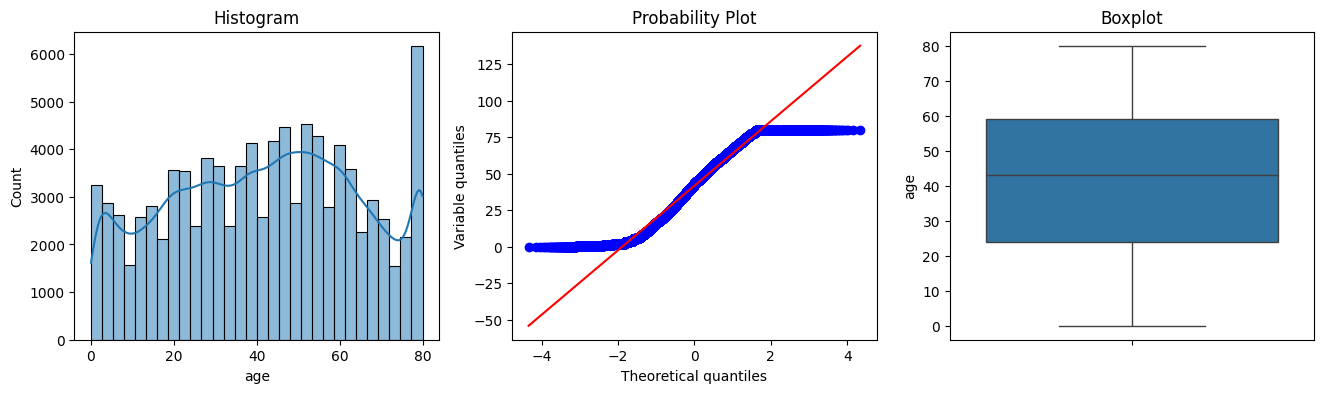

Variabel bmi:


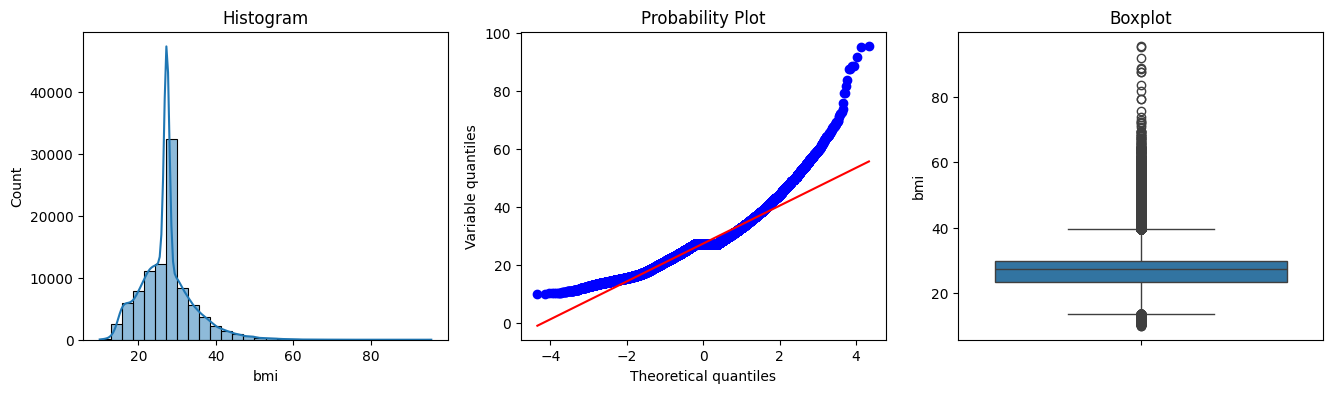

Variabel HbA1c_level:


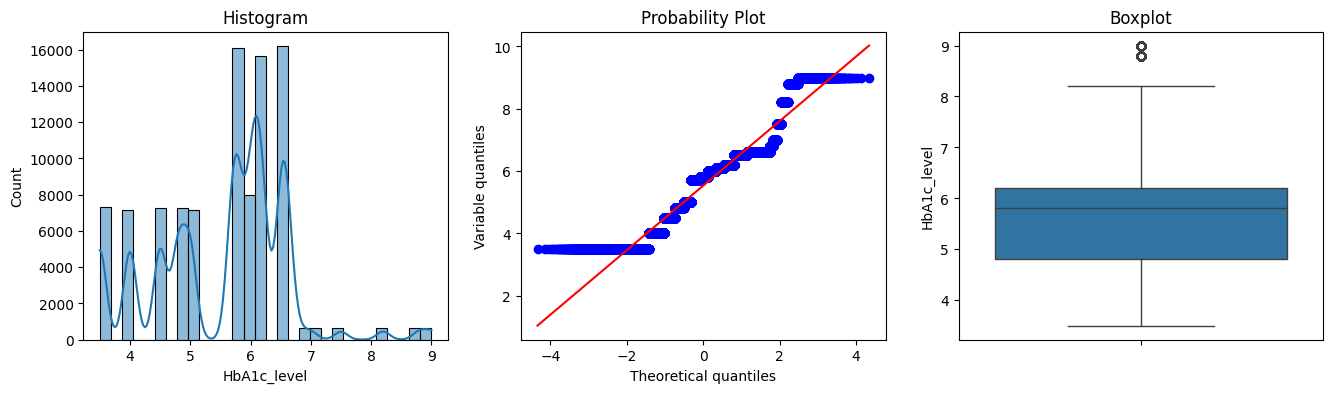

Variabel blood_glucose_level:


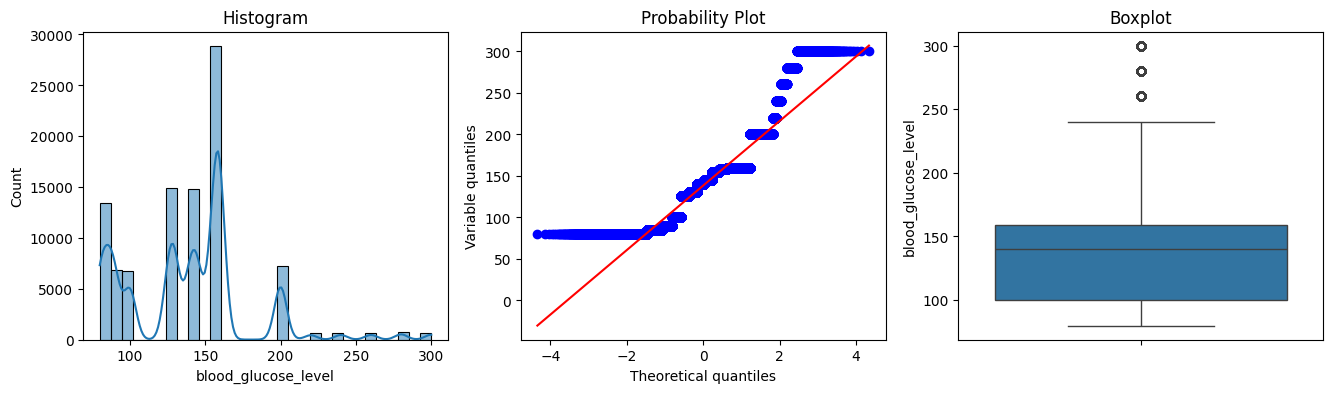

In [20]:
#Cek dengan plot
def check_outlier(df, variable):

  print(f'Variabel {variable}:')

  #ukuran gambar
  plt.figure(figsize=(16,4))

  #histogram
  plt.subplot(1, 3, 1)
  sns.histplot(df[variable], kde=True, bins=30)
  plt.title('Histogram')

  #boxplot
  plt.subplot(1, 3, 3)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')


  #probplot
  plt.subplot(1, 3, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.ylabel('Variable quantiles')

  plt.show()

for i in numerik_df:
  check_outlier(df_clean, i)

Interpetasi:
- Variabel **Age** -> cenderung relatif merata distirbusinya, hampir mendekati normal (hampir membentuk lonceng), kemuian QQ Plot nya banyak data yang mendekati garis linier, dan Boxplotnya tidak ada nilai esktrem. Sehingga, mengindikasikan tidak ada outlier
- Variabel **bmi** -> cenderung membentuk skewness (positif), QQPlot masih ada beberapa yang menjauhi garis linier, dan Boxplotnya masih banyak nilai ekstremnya. Sehingga, mengindikasikan ada outlier.
- Variabel **HbA1c_level** -> cenderung tidak simetris dan membentuk skewness (positif), QQPlot masih ada beberapa yang menjauhi garis linier, dan Boxplotnya masih ada nilai ekstremnya. Sehingga, mengindikasikan ada outlier.
- Variabel **blood_glucose_level** -> cenderung tidak simetris dan membentuk skewness (positif), QQPlot masih ada beberapa yang menjauhi garis linier, dan Boxplotnya masih ada nilai ekstremnya. Sehingga, mengindikasikan ada outlier.

### HANDLING OUTLIERS

In [21]:
def detect_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\nKolom: {column}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Jumlah outlier: {outliers.shape[0]}")

    return outliers.index

# Kumpulkan semua indeks outlier dari seluruh kolom numerik
outlier_indices = set()

for col in numerik_df:
    indices = detect_outlier_iqr(df_clean, col)
    outlier_indices.update(indices)

# Drop semua baris outlier dari dataframe
df_clean_2 = df.drop(index=outlier_indices)

print(f"\nJumlah baris setelah menghapus outlier: {df_clean_2.shape[0]}")


Kolom: age
Q1: 24.00, Q3: 59.00, IQR: 35.00
Lower Bound: -28.50, Upper Bound: 111.50
Jumlah outlier: 0

Kolom: bmi
Q1: 23.39, Q3: 29.87, IQR: 6.48
Lower Bound: 13.67, Upper Bound: 39.59
Jumlah outlier: 5307

Kolom: HbA1c_level
Q1: 4.80, Q3: 6.20, IQR: 1.40
Lower Bound: 2.70, Upper Bound: 8.30
Jumlah outlier: 1311

Kolom: blood_glucose_level
Q1: 100.00, Q3: 159.00, IQR: 59.00
Lower Bound: 11.50, Upper Bound: 247.50
Jumlah outlier: 2030

Jumlah baris setelah menghapus outlier: 92091


In [22]:
df_clean_2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,unknown,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Variabel age:


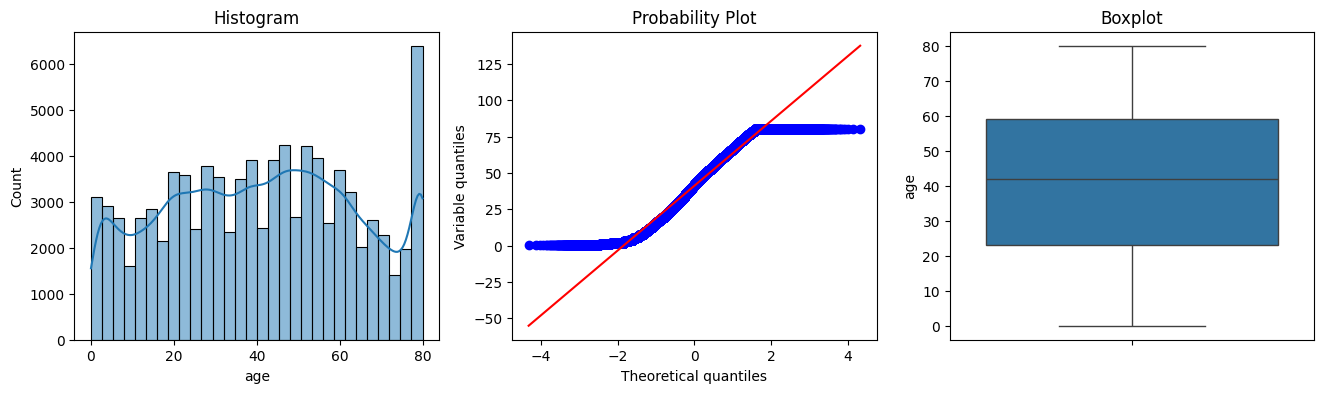

Variabel bmi:


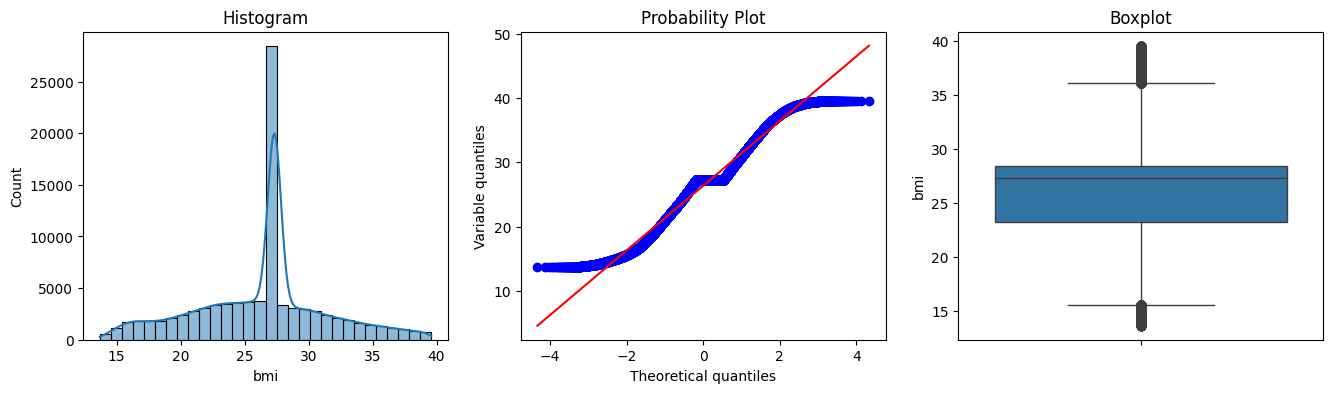

Variabel HbA1c_level:


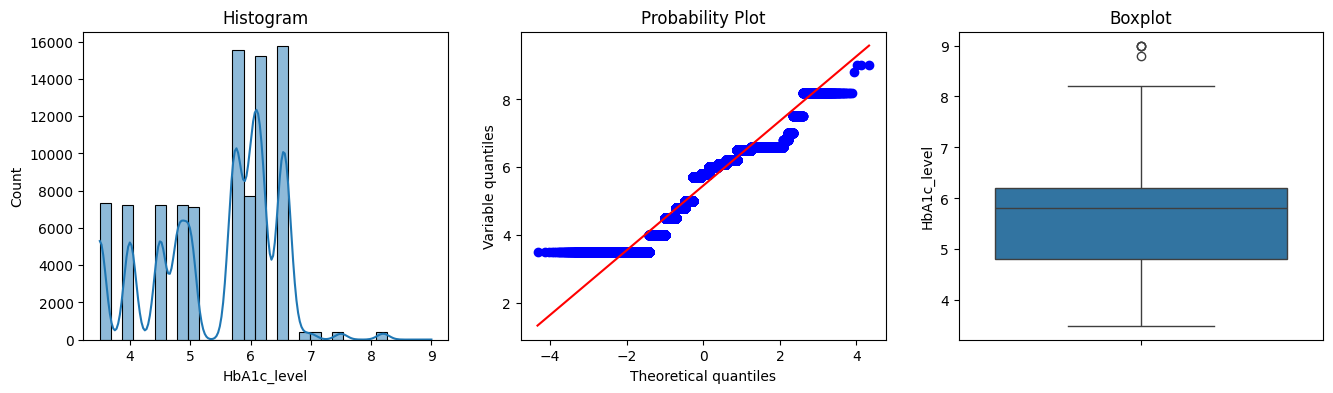

Variabel blood_glucose_level:


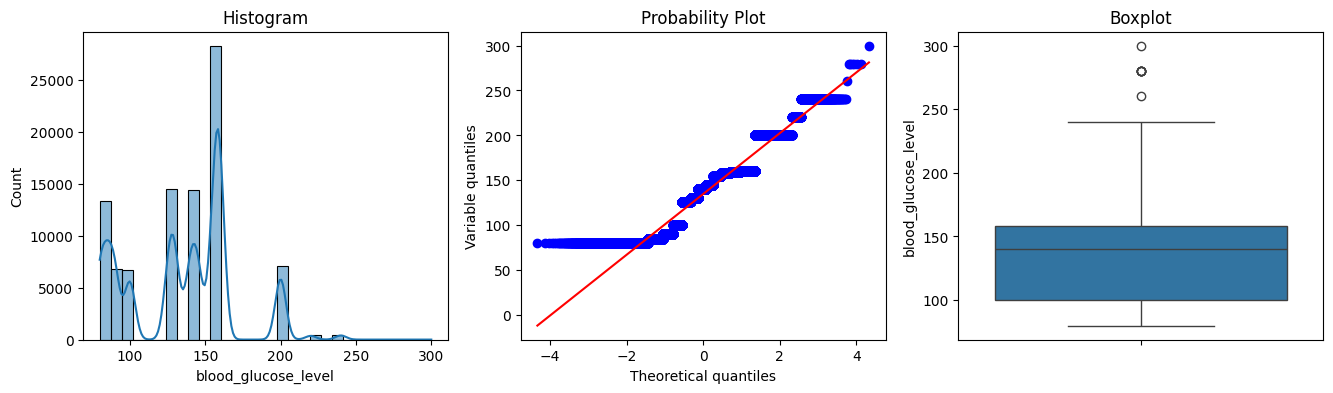

In [23]:
#Recheck
# Melakukan loop untuk mengecek distribusi tiap kolom
for i in numerik_df:
  check_outlier(df_clean_2, i)

Intepretasi: Dari keseluruhan variabel, yang sudah dilakukan handling outlier, beberapa variabel masih ada nilai ekstrem, pas dicek ternyata nilai-nilainya memang dekat banget dengan nilai maksimum/minimumnya, sehingga berhimpitan dan masih dianggap wajar. Maka, lanjut ke step selanjutnya.

## Menyimpan untuk Keperluan Business Insight

In [24]:
df_EDA = df_clean_2.copy()

## Business Insight (EDA)

Dari dataset diabetes ini bisa kita breakdown terkait business question yang dapat kita ambil untuk strategi atau kepentingan, sebagai berikut:
1. Kira-kira kelompok Usia berapa yang berpotensi memiliki penyakit Diabetes?
2. Apakah pasien dengan hipertensi atau kebiasaan merokok atau penyakit jantung lebih berisiko terkena diabetes?
3. Bagaimana pola risiko diabetes berdasarkan riwayat merokok?
4. Kategori BMI, kadar HbA1c dan glukosa darah mana yang paling banyak ditemukan pada penderita diabetes?

#### No.1 Kira-kira kelompok Usia berapa yang berpotensi memiliki penyakit Diabetes?

<ipython-input-40-0bfea7423169>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='age_group', y='diabetes_count', data=age_diabetes_counts, palette='Reds')


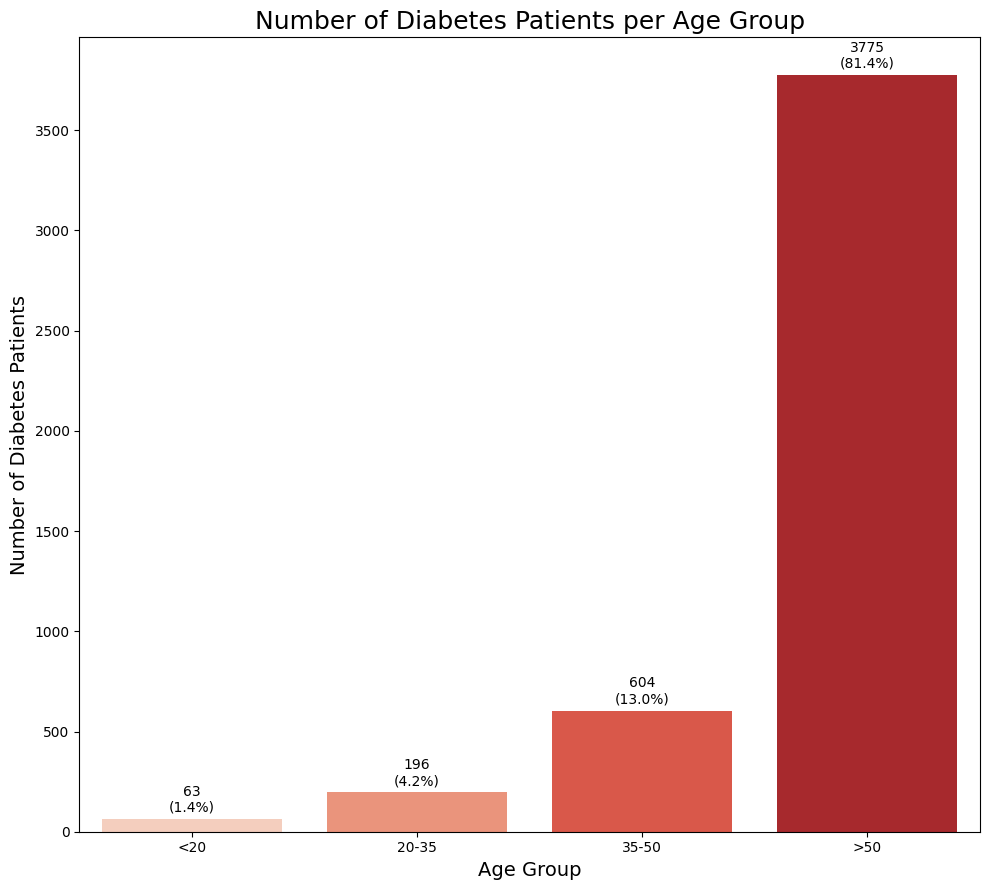

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assumption: df_EDA already exists and has columns 'age' and 'diabetes'

# Define age groups
bins = [0, 20, 35, 50, 100]
labels = ['<20', '20-35', '35-50', '>50']
df_EDA['age_group'] = pd.cut(df_EDA['age'], bins=bins, labels=labels, right=False)

# Filter only diabetes patients
age_diabetes_counts = df_EDA[df_EDA['diabetes'] == 1]

# Count number of diabetes cases per age group
age_diabetes_counts = age_diabetes_counts['age_group'].value_counts().sort_index().reset_index()
age_diabetes_counts.columns = ['age_group', 'diabetes_count']

# Calculate total number of diabetes cases for percentage
total_diabetes = age_diabetes_counts['diabetes_count'].sum()

# Calculate percentage for each group
age_diabetes_counts['percentage'] = (age_diabetes_counts['diabetes_count'] / total_diabetes) * 100

# Visualization
plt.figure(figsize=(10, 9))
barplot = sns.barplot(x='age_group', y='diabetes_count', data=age_diabetes_counts, palette='Reds')

# Add count and percentage labels above each bar
for container, percentage in zip(barplot.containers, age_diabetes_counts['percentage']):
    barplot.bar_label(container, labels=[f"{int(v.get_height())}\n({percentage:.1f}%)" for v in container], label_type='edge', padding=3)

plt.title("Number of Diabetes Patients per Age Group", fontsize=18)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Diabetes Patients", fontsize=14)
plt.tight_layout()
plt.show()


Interpretasi:
Jumlah penderita diabetes meningkat drastis seiring bertambahnya usia. Kelompok usia >50 tahun merupakan kelompok dengan jumlah penderita diabetes paling banyak, mencapai 3775 orang, atau hampir 6 kali lipat dibandingkan kelompok usia 35–50 tahun. Hal ini, menunjukkan bahwa **Usia menjadi faktor risiko kuat untuk diabetes**. Secara teori, meningkatnya prevalensi pada usia lanjut disebabkan oleh:
- Menurunnya sensitivitas insulin seiring usia
- Gaya hidup dan pola makan yang tidak seimbang
- Ada faktor lain, seperti obesitas,atau kondisi kesehatan, seperti hipertensi dan lainnya.

#### No. 2 Apakah pasien dengan hipertensi atau kebiasaan merokok atau penyakit jantung lebih berisiko terkena diabetes?

Buat Hipotesis:

H0 (Hipotesis Nol): Tidak ada hubungan antara hipertensi/kebiasaan merokok/penyakit jantung dengan diabetes.

H1 (Hipotesis Alternatif): Ada hubungan antara hipertensi/kebiasaan merokok/penyakit jantung dengan diabetes.

In [26]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi untuk hipertensi vs diabetes
contingency_hipertensi = pd.crosstab(df_EDA['hypertension'], df_EDA['diabetes'])

# Uji chi-square untuk hipertensi vs diabetes
chi2_hipertensi, p_hipertensi, _, _ = chi2_contingency(contingency_hipertensi)

# Membuat tabel kontingensi untuk penyakit jantung vs diabetes
contingency_jantung = pd.crosstab(df_EDA['heart_disease'], df_EDA['diabetes'])

# Uji chi-square untuk penyakit jantung vs diabetes
chi2_jantung, p_jantung, _, _ = chi2_contingency(contingency_jantung)

# Membuat tabel kontingensi untuk merokok vs diabetes
contingency_merokok = pd.crosstab(df_EDA['smoking_history'], df_EDA['diabetes'])

# Uji chi-square untuk merokok vs diabetes
chi2_merokok, p_merokok, _, _ = chi2_contingency(contingency_merokok)

# Menampilkan hasil
print(f"P-Value Hipertensi vs Diabetes: {p_hipertensi}")
print(f"P-Value Kebiasaan Merokok vs Diabetes: {p_merokok}")
print(f"P-Value Penyakit Jantung vs Diabetes: {p_jantung}")

# Interpretasi hasil
if p_hipertensi < 0.05:
    print("Ada hubungan yang signifikan antara hipertensi dan diabetes.")
else:
    print("Tidak ada hubungan yang signifikan antara hipertensi dan diabetes.")

if p_jantung < 0.05:
    print("Ada hubungan yang signifikan antara penyakit jantung dan diabetes.")
else:
    print("Tidak ada hubungan yang signifikan antara penyakit jantung dan diabetes.")

if p_merokok < 0.05:
    print("Ada hubungan yang signifikan antara kebiasaan merokok dan diabetes.")
else:
    print("Tidak ada hubungan yang signifikan antara kebiasaan merokok dan diabetes.")

P-Value Hipertensi vs Diabetes: 0.0
P-Value Kebiasaan Merokok vs Diabetes: 1.8797111146275744e-216
P-Value Penyakit Jantung vs Diabetes: 0.0
Ada hubungan yang signifikan antara hipertensi dan diabetes.
Ada hubungan yang signifikan antara penyakit jantung dan diabetes.
Ada hubungan yang signifikan antara kebiasaan merokok dan diabetes.


Interpretasi: Karena memang adanya hubungan dari ketiga faktor tersebut terhadap diabetes, maka menjadi indikasi kuat kalau orang yang memiliki riwayat hipertensi, penyakit jantung, dan kebiasaan merokok dapat memicu indikasi penyakit diabetes.

Secara teori, **memang benar ketika tidak terkontrol gula darah maka akan memicu penyakit jantung dan berefek pada diabetes. Selain itu, gaya hidup yang tidak sehat dapat meningkatkan hipertensi dan berefek pada diabetes. Begitupun juga, kebiasaan merokok juga memicu sensitivitas insulin dan metabolisme glukosa sehingga dapat berakibat diabetes.**

#### No.3 Bagaimana pola risiko diabetes berdasarkan riwayat merokok?

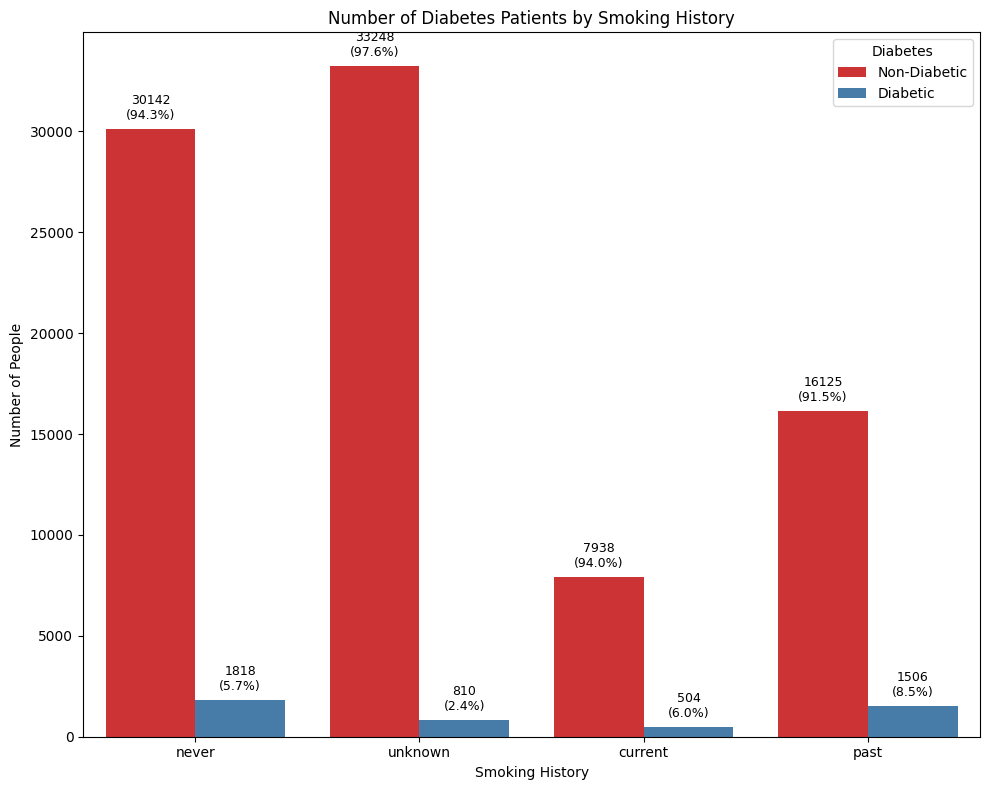

In [41]:
# Visualization
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='smoking_history', hue='diabetes', data=df_EDA, palette='Set1')

# Add title and axis labels
plt.title("Number of Diabetes Patients by Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Number of People")
plt.legend(title='Diabetes', labels=['Non-Diabetic', 'Diabetic'])

# Calculate total count per 'smoking_history' category
total_per_category = df_EDA.groupby('smoking_history').size()

# Get x-axis category labels
x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Add count and percentage labels above each bar
for p in ax.patches:
    height = p.get_height()

    # Calculate label position
    x_position = p.get_x() + p.get_width() / 2.
    label_index = round(x_position)

    # Ensure the label index is valid
    if label_index < len(x_tick_labels):
        category_name = x_tick_labels[label_index]
    else:
        continue

    # Calculate total and percentage
    total = total_per_category[category_name]
    percent = height / total * 100 if total > 0 else 0

    # Show label only if height and percentage > 0
    if height > 0 and percent > 0:
        label_text = f'{int(height)}\n({percent:.1f}%)'
        ax.annotate(label_text,
                    (x_position, height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Interpretasi:
- **Proporsi penderita diabetes tertinggi ada pada kelompok “past smoker” (mantan perokok) yaitu 8.5%.**
- **Current smoker** (perokok aktif) memiliki proporsi penderita diabetes sebesar 6.0%, sedikit lebih tinggi dari never smoker (5.7%).
- **Unknown** mendominasi jumlah responden, tetapi tidak bisa diinterpretasi dengan pasti karena data diabetes tidak ditampilkan/tersedia.

#### No. 4 Kategori BMI, kadar HbA1c dan glukosa darah mana yang paling banyak ditemukan pada penderita diabetes?

<ipython-input-42-e8499a68f234>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_diabetes, x='hba1c_category', palette='Set2')


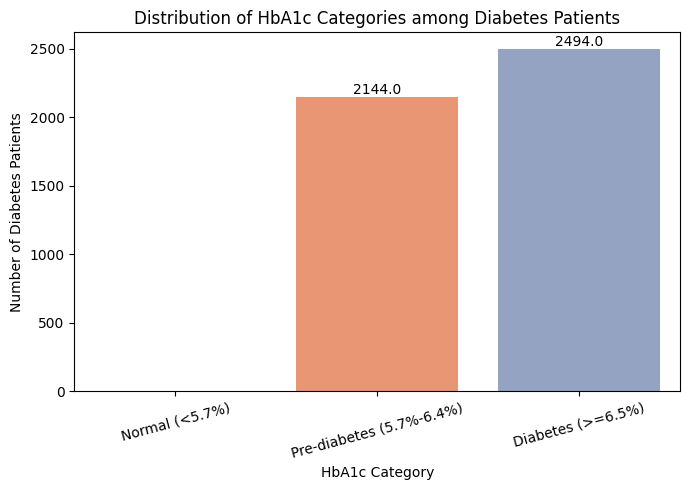

In [42]:
# Create HbA1c level categories
bins = [0, 5.7, 6.4, float('inf')]
labels = ['Normal (<5.7%)', 'Pre-diabetes (5.7%-6.4%)', 'Diabetes (>=6.5%)']

# Filter diabetes patients
df_diabetes = df_EDA[df_EDA['diabetes'] == 1].copy()

# Add HbA1c category column
df_diabetes['hba1c_category'] = pd.cut(df_diabetes['HbA1c_level'], bins=bins, labels=labels, right=False)

# Count per category
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df_diabetes, x='hba1c_category', palette='Set2')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Title and axis labels
plt.title('Distribution of HbA1c Categories among Diabetes Patients')
plt.xlabel('HbA1c Category')
plt.ylabel('Number of Diabetes Patients')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Interpretasi:
- **Mayoritas penderita diabetes memiliki HbA1c ≥6.5%** → Ini sesuai dengan kriteria diagnosis klinis dari WHO dan ADA bahwa seseorang dinyatakan diabetes jika kadar HbA1c ≥6.5%.
- **Sebanyak 2.144 orang (≈46%) berada dalam kategori pra-diabetes** meski sudah terdiagnosis diabetes. Hal ini, menunjukkan memungkinkan pasien tersebut HbA1cnya turun karena sudah pengobatan atau bisa juga kesalahan diagnosis.
- **Kategori normal (<5.7%) tidak muncul** → Menunjukkan konsistensi, karena penderita diabetes seharusnya tidak memiliki HbA1c normal, kecuali telah menjalani pengobatan intensif.



<ipython-input-43-12a410f4cf45>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_EDA[df_EDA['diabetes'] == 1], x='glucose_category', palette='pastel')


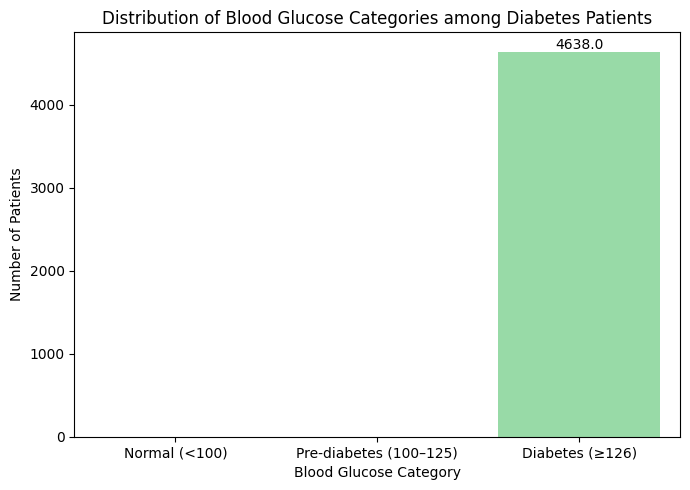

In [43]:
# Define glucose level category boundaries and labels
glucose_bins = [0, 100, 126, float('inf')]
glucose_labels = ['Normal (<100)', 'Pre-diabetes (100–125)', 'Diabetes (≥126)']

# Add glucose category column to df_EDA
df_EDA['glucose_category'] = pd.cut(df_EDA['blood_glucose_level'],
                                    bins=glucose_bins,
                                    labels=glucose_labels,
                                    right=False)

# Visualize glucose category distribution among diabetes patients in df_EDA
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df_EDA[df_EDA['diabetes'] == 1], x='glucose_category', palette='pastel')

# Add count labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Blood Glucose Categories among Diabetes Patients')
plt.xlabel('Blood Glucose Category')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


Interpretasi:
- Mayoritas penderita diabetes dalam dataset memiliki kadar glukosa darah ≥126 mg/dL, yang memang merupakan ambang batas klinis untuk diagnosis diabetes.

- Jumlah penderita dengan kadar glukosa normal atau pra-diabetes sangat minim atau tidak tercatat, karena dataset ini kemungkinan memang hanya memuat data pasien yang sudah terdiagnosis atau terindikasi kuat menderita diabetes.

<ipython-input-44-02a86f7ebed0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(data=bmi_diabetes, x='bmi_category', y='count', palette='Reds')


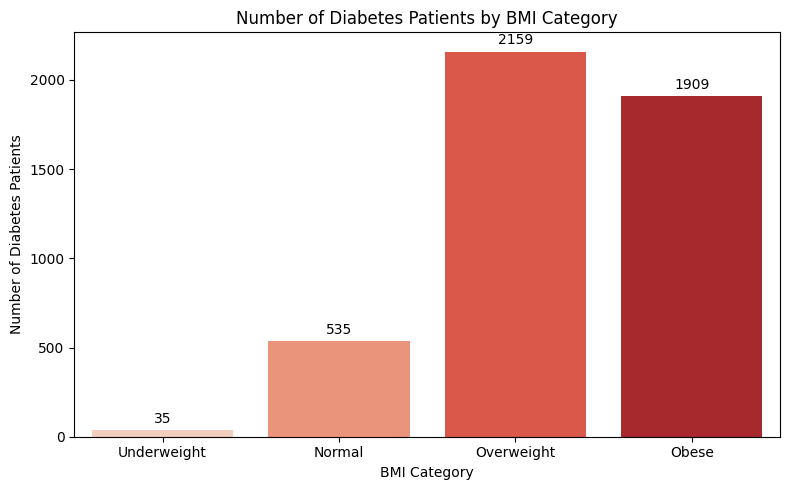

In [44]:
# Create BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df_EDA['bmi_category'] = pd.cut(df_EDA['bmi'], bins=bmi_bins, labels=bmi_labels)

# Count number of diabetes patients by BMI category
bmi_diabetes = df_EDA[df_EDA['diabetes'] == 1]['bmi_category'].value_counts().sort_index().reset_index()
bmi_diabetes.columns = ['bmi_category', 'count']

# Visualization
plt.figure(figsize=(8,5))
b = sns.barplot(data=bmi_diabetes, x='bmi_category', y='count', palette='Reds')
plt.title('Number of Diabetes Patients by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Diabetes Patients')

# Add value labels on bars
for container in b.containers:
    b.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()


Interpretasi:

- Mayoritas penderita diabetes berada pada kategori Overweight dan Obese, yaitu lebih dari 80% kasus jika digabung. hal ini, selaras dengan teori bahwa semakin overweight bahkan obesitas maka akan memicu penyakit diabetes, karena memengaruhi kerja insulin

- Penderita dengan BMI normal cukup kecil dibandingkan dengan dua kategori di atas. Selain itu, Penderita dengan BMI rendah (Underweight) sangat jarang ditemukan dalam kasus diabetes. Hal ini, menunjukkan memang jarang sekali orang yang tidak overweight bahkan obesitas memicu diabetes, namun mungin cenderung ada faktor lain misal genetik atau faktor-faktor sebelumnya, seperti kebiasaan merokok, penyakit jantung/hipertensi dari pola hidupnya yang tidak sehat, dan lainnya.

In [ ]:
df_EDA

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,kategori_glukosa,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,>50,Diabetes (≥126),Overweight
1,Female,54.0,0,0,unknown,27.32,6.6,80,0,>50,Normal (<100),Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,20-35,Diabetes (≥126),Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,35-50,Diabetes (≥126),Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,>50,Diabetes (≥126),Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,unknown,27.32,6.2,90,0,>50,Normal (<100),Overweight
99996,Female,2.0,0,0,unknown,17.37,6.5,100,0,<20,Pra-diabetes (100–125),Underweight
99997,Male,66.0,0,0,past,27.83,5.7,155,0,>50,Diabetes (≥126),Overweight
99998,Female,24.0,0,0,never,35.42,4.0,100,0,20-35,Pra-diabetes (100–125),Obese


## SPLITTING DATA

Splitting data ini menggunakan data training dan testing dengan langsung hypertuning parameter, sehingga tidak perlu splitting untuk data validasi. Pembagian persentase training dan testing adalah masing-masing sebesar **80% dan 20%**.

In [ ]:
X = df_clean_2.drop(columns=['diabetes']).to_numpy()
y = df_clean_2[['diabetes']].to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (73672, 8)
X_test shape : (18419, 8)
y_train shape: (73672,)
y_test shape : (18419,)


## ANALISIS FITUR (KORELASI + VIF)

**Analisis Fitur** ini digunakan untuk memilih variabel-variabel yang berpengaruh signifikan atau tidak ke suatu variabel target atau menyeleksi apakah variabel-variabel fitur saling multikolinearitas atau tidak. Terjadinya multikolinearitas akan memngaruhi model prediksi dimana standar errornya akan besar (dalam kasus regresi) kalau dalam kasus klasifikasi prediksi akan memengaruhi metrik evaluasinya dimana kurangnya memprediksi secara tepat atau bisa terjadi overfitting.

In [ ]:
# Urutan kolom
columns = df.drop(columns=['diabetes']).columns.tolist()

# Index kolom yang kamu mau
idx = [columns.index(col) for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Akses dari X_train
X_train[:, idx]
X_train_numerik = X_train[:, idx]
X_train_numerik_df = pd.DataFrame(X_train_numerik, columns=numerik_df)

In [ ]:
X_train_numerik_df.head()

,age,bmi,HbA1c_level,blood_glucose_level
0,46.0,23.57,5.7,159
1,74.0,29.8,6.1,130
2,4.0,27.32,6.5,130
3,28.0,31.66,5.0,200
4,44.0,27.32,4.0,155


In [ ]:
print(X_train_numerik_df.dtypes)

age                    object
bmi                    object
HbA1c_level            object
blood_glucose_level    object
dtype: object


Interpretasi: Karena tipenya berubah jadi object, maka kita rubah menjadi numerik.

In [ ]:
for col in X_train_numerik_df.columns:
    X_train_numerik_df[col] = pd.to_numeric(X_train_numerik_df[col], errors='coerce')

In [ ]:
# Kalkulasi Skor VIF

X = add_constant(X_train_numerik_df)

# Hitung VIF
skor_vif = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                        index=X.columns).reset_index()
skor_vif.columns = ['feature', 'vif_score']

# Drop konstanta
skor_vif = skor_vif.loc[skor_vif.feature != 'const']
print(skor_vif)

               feature  vif_score
1                  age   1.189459
2                  bmi   1.186659
3          HbA1c_level   1.005664
4  blood_glucose_level   1.005774


Interpretasi: VIFnya <10 bahkan <5, sehingga tidak ada indikasi multikolinearitas

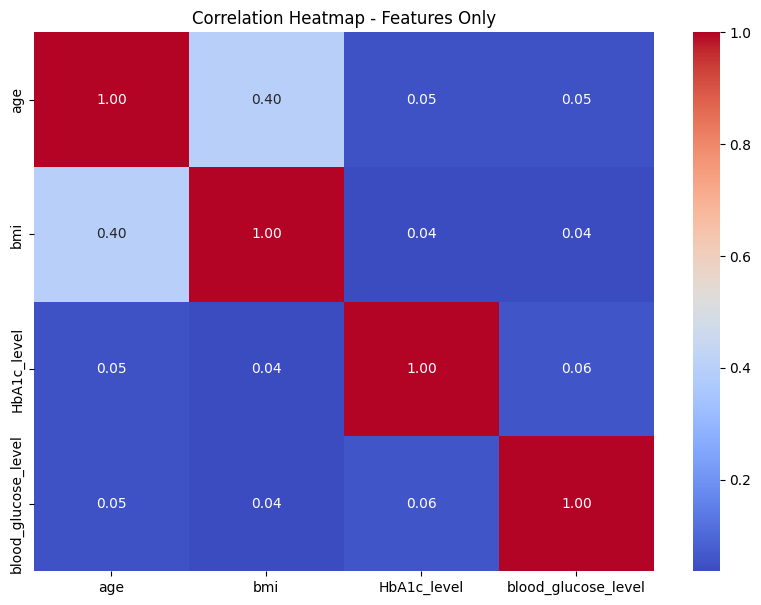

In [ ]:
# Cukup ini aja buat cek korelasi antar fitur numerik
corr = X_train_numerik_df.corr()

# Visualisasinya
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap - Features Only')
plt.show()

Interpretasi:
- Tresshold untuk indikasi multikolinearitas antar variabel fitur adalah r > 0,8
- Secara korelasi heatmap, tidak ada yang nilai korelasinya > 0,8. Maka, tidak ada indikasi multikolinearitas. Sehingga, tidak perlu didrop variabel.

## ENCODING DATA

Varibel kategorinya adalah kategori hipertensi, Riwayat Penyakit Jantung, Jenis Diabetes, dan History Merokok. Untuk Variabel History Merokok dan Gender saja yang belum diencoding, sisanya sudah. Maka, encoding sesuai dengan teori encoding.

## Pengubahan ke Dataframe

In [ ]:
fitur = df.drop(columns=['diabetes']).columns
X_train = pd.DataFrame(X_train, columns=fitur)
X_test = pd.DataFrame(X_test, columns=fitur)
y_train = pd.DataFrame(y_train, columns=['diabetes'])
y_test = pd.DataFrame(y_test, columns=['diabetes'])

Mari kita cek Variabel History Merokok

In [ ]:
X_train['smoking_history'].value_counts()

,count
smoking_history,
unknown,27158
never,25708
past,14047
current,6759


In [ ]:
X_test['smoking_history'].value_counts()

,count
smoking_history,
unknown,6900
never,6252
past,3584
current,1683


Interpetasi: Terdapat 4 kategori, maka dilakukan encoding dengan One Hot Encoding. Karena saya ingin membandingkan 5 model, yaitu Logistic Regression, KNN, Decision Tree, dan Random Forest. Sehingga, yang paling aman adalah One Hot Encoding. Hal ini, karena **Ohe Hot Encoding tidak memberi bobot urutan numerik, jadi semua model bisa mengonsumsi data itu dengan aman.**

Mari Kita Cek Variabel Gender

In [ ]:
X_train['gender'].value_counts()

,count
gender,
Female,42917
Male,30755


In [ ]:
X_test['gender'].value_counts()

,count
gender,
Female,10699
Male,7720


Interpetasi: Terdapat 2 kategori, maka kita gunakan Label Encoder untuk encoding **gender**

### ENCODING TRAIN

In [ ]:
# Label encode 'gender'
label_encoders = {}
le_gender = LabelEncoder()
X_train['gender'] = le_gender.fit_transform(X_train['gender'])
label_encoders['gender'] = le_gender  # simpan encoder-nya

# One-hot encode 'smoking_history'
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
smoking_ohe = ohe.fit_transform(X_train[['smoking_history']])
smoking_cols = ohe.get_feature_names_out(['smoking_history'])
df_smoking_ohe_train = pd.DataFrame(smoking_ohe, columns=smoking_cols, index=X_train.index)

In [ ]:
X_train = pd.concat([
    X_train.drop(columns=['smoking_history']),
    df_smoking_ohe_train
], axis=1)

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown
0,0,46.0,0,0,23.57,5.7,159,0.0,0.0,1.0,0.0
1,0,74.0,0,0,29.8,6.1,130,0.0,0.0,0.0,1.0
2,0,4.0,0,0,27.32,6.5,130,0.0,1.0,0.0,0.0
3,1,28.0,0,0,31.66,5.0,200,0.0,1.0,0.0,0.0
4,1,44.0,0,0,27.32,4.0,155,0.0,0.0,0.0,1.0


### ENCODING TESTING

In [ ]:
# Label encode 'gender'
X_test['gender'] = le_gender.transform(X_test['gender'])

# One-hot encode 'smoking_history'
smoking_ohe = ohe.transform(X_test[['smoking_history']])
smoking_cols = ohe.get_feature_names_out(['smoking_history'])
df_smoking_ohe_test = pd.DataFrame(smoking_ohe, columns=smoking_cols, index=X_test.index)

In [ ]:
# Gabungkan hasil encoding dengan X_test
X_test = pd.concat([X_test.drop(columns=['smoking_history']), df_smoking_ohe_test], axis=1)

In [ ]:
X_test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown
0,1,67.0,0,0,27.32,6.0,80,0.0,0.0,1.0,0.0
1,0,30.0,0,0,32.5,4.5,130,0.0,0.0,1.0,0.0
2,1,70.0,0,0,27.32,6.6,160,0.0,0.0,1.0,0.0
3,0,26.0,0,0,38.34,5.0,100,1.0,0.0,0.0,0.0
4,1,26.0,0,0,23.33,5.8,126,0.0,1.0,0.0,0.0


In [ ]:
#Recheck2
len(X_train), len(X_test), len(y_train), len(y_test)

(73672, 18419, 73672, 18419)

Okay data sudah terencoding sempurna, sehingga lanjut masuk scalling data karena saya akan menggunakan beberaapa model, terutama **KNN** yang membutuhkan scalling karena berkaitan dengan jarak/distance. Sehingga, wajib **discalling**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73672 entries, 0 to 73671
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   73672 non-null  int64  
 1   age                      73672 non-null  object 
 2   hypertension             73672 non-null  object 
 3   heart_disease            73672 non-null  object 
 4   bmi                      73672 non-null  object 
 5   HbA1c_level              73672 non-null  object 
 6   blood_glucose_level      73672 non-null  object 
 7   smoking_history_current  73672 non-null  float64
 8   smoking_history_never    73672 non-null  float64
 9   smoking_history_past     73672 non-null  float64
 10  smoking_history_unknown  73672 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 6.2+ MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18419 entries, 0 to 18418
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   18419 non-null  int64  
 1   age                      18419 non-null  object 
 2   hypertension             18419 non-null  object 
 3   heart_disease            18419 non-null  object 
 4   bmi                      18419 non-null  object 
 5   HbA1c_level              18419 non-null  object 
 6   blood_glucose_level      18419 non-null  object 
 7   smoking_history_current  18419 non-null  float64
 8   smoking_history_never    18419 non-null  float64
 9   smoking_history_past     18419 non-null  float64
 10  smoking_history_unknown  18419 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


Ubah ke numerik untuk **age, hypertension, heart_disease, bmi, dan HbA1c_level**

In [ ]:
# Konversi kolom pada data Training (X_training) menjadi numerik
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce')
X_train['hypertension'] = pd.to_numeric(X_train['hypertension'], errors='coerce')
X_train['heart_disease'] = pd.to_numeric(X_train['heart_disease'], errors='coerce')
X_train['bmi'] = pd.to_numeric(X_train['bmi'], errors='coerce')
X_train['HbA1c_level'] = pd.to_numeric(X_train['HbA1c_level'], errors='coerce')

# Konversi kolom pada data testing (X_test) menjadi numerik
X_test['age'] = pd.to_numeric(X_test['age'], errors='coerce')
X_test['hypertension'] = pd.to_numeric(X_test['hypertension'], errors='coerce')
X_test['heart_disease'] = pd.to_numeric(X_test['heart_disease'], errors='coerce')
X_test['bmi'] = pd.to_numeric(X_test['bmi'], errors='coerce')
X_test['HbA1c_level'] = pd.to_numeric(X_test['HbA1c_level'], errors='coerce')

## SCALLING DATA

Scalling menggunakan Standar Scaller bagus dan cocok untuk untuk KNN dan Logistic Regression karena karakteristik ketiga model itu sangat sensitif terhadap skala fitur. StandardScaler akan men-transformasi data menjadi distribusi dengan mean = 0 dan standar deviasi = 1.

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
#pisahkan numerik dan non numerik
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
numerik_df = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
non_numerik_df = [col for col in X_train_scaled.columns if col not in numerik_df]

### SCALED TRAINING

In [ ]:
scaler = StandardScaler()
numerik_scaled = scaler.fit_transform(X_train_scaled[numerik_df])

In [ ]:
#gabung
X_train_scaled = pd.concat([
    X_train_scaled[non_numerik_df].reset_index(drop=True),
    pd.DataFrame(numerik_scaled, columns=numerik_df)
], axis=1)

In [ ]:
X_train_scaled.head()

,gender,hypertension,heart_disease,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown,age,bmi,HbA1c_level,blood_glucose_level
0,0,0,0,0.0,0.0,1.0,0.0,0.209771,-0.547454,0.242321,0.691907
1,0,0,0,0.0,0.0,0.0,1.0,1.446610,0.671642,0.643500,-0.130459
2,0,0,0,0.0,1.0,0.0,0.0,-1.645487,0.186352,1.044679,-0.130459
3,1,0,0,0.0,1.0,0.0,0.0,-0.585340,1.035610,-0.459742,1.854564
4,1,0,0,0.0,0.0,0.0,1.0,0.121425,0.186352,-1.462690,0.578477


### SCALED TESTING

In [ ]:
numerik_scaled_2 = scaler.transform(X_test_scaled[numerik_df])

In [ ]:
#gabung
X_test_scaled = pd.concat([
    X_test_scaled[non_numerik_df].reset_index(drop=True),
    pd.DataFrame(numerik_scaled_2, columns=numerik_df)
], axis=1)

In [ ]:
X_test_scaled.head()

,gender,hypertension,heart_disease,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown,age,bmi,HbA1c_level,blood_glucose_level
0,1,0,0,0.0,0.0,1.0,0.0,1.137400,0.186352,0.543205,-1.548333
1,0,0,0,0.0,0.0,1.0,0.0,-0.496994,1.199983,-0.961216,-0.130459
2,1,0,0,0.0,0.0,1.0,0.0,1.269918,0.186352,1.144974,0.720265
3,0,0,0,1.0,0.0,0.0,0.0,-0.673685,2.342764,-0.459742,-0.981183
4,1,0,0,0.0,1.0,0.0,0.0,-0.673685,-0.594418,0.342616,-0.243889


Interpretasi: Sudah terscalling dengan baik antara data training dan testing. Sehingga Lanjut ke Pemodellan + Evaluasi

# MODELLING + EVALUATION

In [ ]:
y_train.value_counts()

,count
diabetes,
0,69956
1,3716


Interpretasi:  Karena perbedaan jumlah kelasnya terlalu jauh, maka data imbalanced, sehingga pemilihan metrik evaluasi menggunakan Akurasi tidak cocok/tidak tepat. Maka bisa menggunakan, Recall, F-1 Score, atau Precision.

Dalam pemodellan ini saya akan melakukan skema penelitian, yaitu sebagai berikut:
1. **Skema 1** dengan -> Membandingkan 5 model Non SMOTE (Logistic Regression, KNN, Decision Tree, dan Random Forest)
2. **Skema 2** dengan -> Membandingkan 5 model SMOTE (Logistic Regression, KNN, Decision Tree, dan Random Forest)
3. **Skema 3** -> Membandingkan yang terbaik diantara Skema 1 dan Skema 2.

Untuk metrik evaluasi, dipilih **Recall** sebagai fokus utama karena prioritasnya ingin mendeteksi apakah pasien tersebut menderita diabetes atau tidak. Recall juga mengukur seberapa banyak dari total pasien yang benar-benar menderita diabetes, yang berhasil terdeteksi oleh model

Oleh karena itu, model yang memiliki kemampuan tinggi dalam mendeteksi pasien yang menderita diabetes (meskipun berisiko memunculkan false positive) dianggap lebih bermanfaat.

Hasil prediksi ini nantinya akan digunakan oleh instansi terkait guna meminimalisisr terjadinya diabetes hingga menjadi diabetes akut, sehingga akan meminimalkan resiko kematian akibat menderita **diabetes**

**<h3> Bagaimana Metrik ini digunakan </h3>**

1. Recall digunakan sebagai acuan utama dalam pemilihan model terbaik, dibandingkan hanya mengandalkan Accuracy.

2. Meskipun Accuracy tinggi, jika Recall rendah → model gagal mendeteksi pasien menderita diabetes.

3. Dalam evaluasi, digunakan juga Confusion Matrix agar bisa memantau FN dan TP dengan jelas.



## Tuning Hyperparameter menggunakan GridSearchCV

**Karena data imbalance, jika tanpa smote maka wajib model-model selain KNN perlu dilakukan random state dan class_weight = Balanced. Kenapa, KNN tidak perlu, karena sifatnya deterministik dimana KNN tidak melibatkan proses acak.**

## TRAINING

### KNN

In [ ]:
# Parameter yang dituning
param_knn = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Buat scorers
scorers = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# GridSearchCV dengan multiple scoring
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_knn,
    scoring=scorers,
    refit='recall',  # gunakan recall sebagai metrik utama untuk pemilihan model
    cv=5,
    return_train_score=True
)

# Fit model
grid_knn.fit(X_train_scaled, y_train)

# Ambil hasil cross-validation
cv_result = pd.DataFrame(grid_knn.cv_results_)

# Pilih kolom-kolom penting
retain_cols = [
    'params',
    'mean_train_precision', 'mean_test_precision',
    'mean_train_recall', 'mean_test_recall',
    'mean_train_f1', 'mean_test_f1',
    'rank_test_recall'
]

# Tampilkan hasil disortir berdasarkan recall
cv_result[retain_cols].sort_values('rank_test_recall')

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

,params,mean_train_precision,mean_test_precision,mean_train_recall,mean_test_recall,mean_train_f1,mean_test_f1,rank_test_recall
1,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.999580,0.752800,0.992095,0.727724,0.995806,0.739481,1
11,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.999580,0.751554,0.992095,0.724035,0.995806,0.736837,2
13,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.999580,0.804379,0.992095,0.710627,0.995806,0.747739,3
3,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.999580,0.805366,0.992095,0.709645,0.995806,0.747358,4
12,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.938296,0.833175,0.789323,0.706748,0.846876,0.753247,5
2,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.933765,0.828958,0.788447,0.706024,0.844856,0.751507,6
5,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.999580,0.840732,0.992095,0.697633,0.995806,0.747801,7
15,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.999580,0.837381,0.992095,0.695521,0.995806,0.745209,8
4,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.936918,0.872278,0.736935,0.691448,0.804172,0.749572,9
14,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.944538,0.883898,0.738304,0.690113,0.807084,0.750711,10


### Decision Tree

In [ ]:
# 1. Parameter tuning yang kamu pakai
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Skor evaluasi yang ingin kamu hitung
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 3. GridSearchCV dengan multi-metric
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_dt,
    scoring=scoring,
    refit='recall',  # Model terbaik dipilih berdasarkan recall tertinggi
    cv=5
)

# 4. Fit model ke training data
grid_dt.fit(X_train, y_train)

# 5. Lihat hasil evaluasi
cv_result = pd.DataFrame(grid_dt.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
18,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.616596,0.885737,0.645265,1
20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.616596,0.885737,0.645265,1
19,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.616596,0.885737,0.645265,1
6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.618319,0.885633,0.648484,4
8,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.618319,0.885633,0.648484,4
7,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.618319,0.885633,0.648484,4
4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.603999,0.878877,0.620422,7
3,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.603999,0.878877,0.620422,7
5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.603999,0.878877,0.620422,7
17,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.601774,0.877919,0.615348,10


### Random Forest

In [ ]:
# 1. Parameter untuk tuning
param_rf = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5]
}

# 2. Multi-metric scoring
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 3. GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_rf,
    scoring=scoring,
    refit='recall',  # refit pakai recall tertinggi
    cv=5
)

# 4. Fit ke data training
grid_rf.fit(X_train, y_train)

# 5. Lihat hasil cross-validation
cv_result = pd.DataFrame(grid_rf.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
23,"{'max_depth': 5, 'n_estimators': 40}",0.607855,0.884557,0.627888,1
24,"{'max_depth': 5, 'n_estimators': 50}",0.608461,0.884282,0.629231,2
18,"{'max_depth': 4, 'n_estimators': 40}",0.607402,0.884170,0.626974,3
21,"{'max_depth': 5, 'n_estimators': 20}",0.607031,0.883975,0.626207,4
20,"{'max_depth': 5, 'n_estimators': 10}",0.606197,0.883794,0.624443,5
22,"{'max_depth': 5, 'n_estimators': 30}",0.606702,0.883723,0.625540,6
19,"{'max_depth': 4, 'n_estimators': 50}",0.607900,0.883689,0.628131,7
16,"{'max_depth': 4, 'n_estimators': 20}",0.606120,0.883101,0.624396,8
17,"{'max_depth': 4, 'n_estimators': 30}",0.605973,0.882640,0.624160,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.605902,0.882081,0.624135,10


### Logistic Regression

In [ ]:
# 1. Pipeline
pipeline_lr = Pipeline([
    ('clf', LogisticRegression(
        solver='liblinear',
        random_state=42,
        class_weight='balanced'  # sesuaikan dengan kondisi data
    ))
])

# 2. Parameter grid
param_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# 3. Scoring multiple metrics
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 4. Grid search dengan multi-metric
grid_lr_train = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_lr,
    scoring=scoring,
    refit='recall',  # pilih model terbaik berdasarkan recall
    cv=5
)

# 5. Fit model
grid_lr_train.fit(X_train_scaled, y_train)

# 6. Hasil grid search
cv_result = pd.DataFrame(grid_lr_train.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
1,"{'clf__C': 0.01, 'clf__penalty': 'l2'}",0.609962,0.861189,0.635926,1
0,"{'clf__C': 0.01, 'clf__penalty': 'l1'}",0.610452,0.861110,0.636865,2
3,"{'clf__C': 0.1, 'clf__penalty': 'l2'}",0.611837,0.860353,0.639553,3
2,"{'clf__C': 0.1, 'clf__penalty': 'l1'}",0.611931,0.860326,0.639726,4
6,"{'clf__C': 10, 'clf__penalty': 'l1'}",0.611929,0.859909,0.639774,5
7,"{'clf__C': 10, 'clf__penalty': 'l2'}",0.611921,0.859902,0.639760,6
5,"{'clf__C': 1, 'clf__penalty': 'l2'}",0.611904,0.859888,0.639731,7
4,"{'clf__C': 1, 'clf__penalty': 'l1'}",0.611875,0.859761,0.639694,8


## TESTING

### KNN

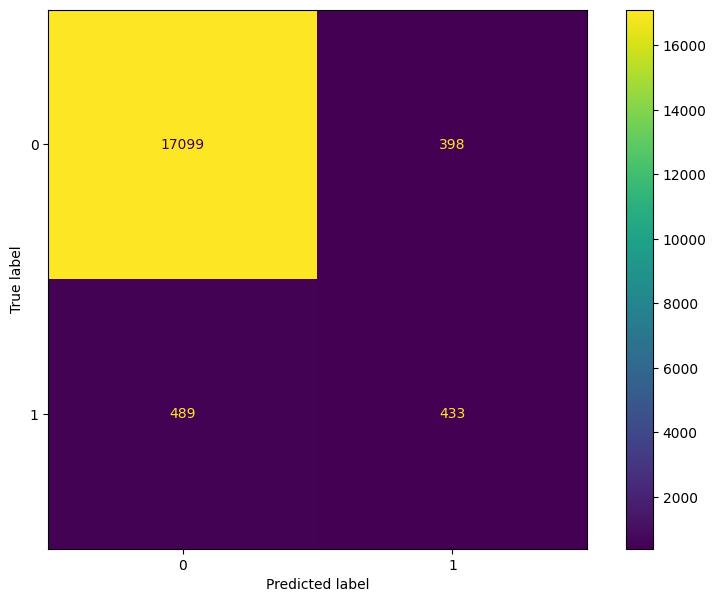

In [ ]:
# the confusion matrix (the best model from gridcv)

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_knn.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=grid_knn.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_knn.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
y_pred = grid_knn.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17497
           1       0.52      0.47      0.49       922

    accuracy                           0.95     18419
   macro avg       0.75      0.72      0.73     18419
weighted avg       0.95      0.95      0.95     18419



### Decision Tree

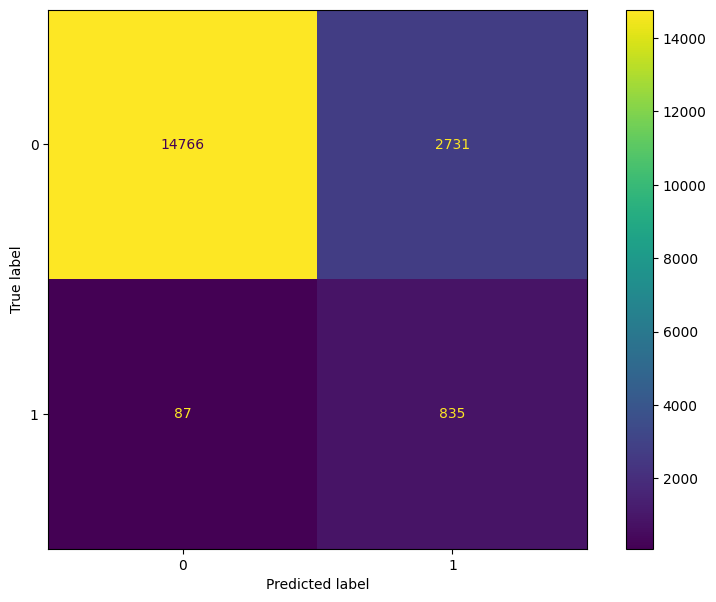

In [ ]:
# the confusion matrix (the best model from gridcv)

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_dt.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=grid_dt.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_dt.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
y_pred = grid_dt.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     17497
           1       0.23      0.91      0.37       922

    accuracy                           0.85     18419
   macro avg       0.61      0.87      0.64     18419
weighted avg       0.96      0.85      0.89     18419



### Random Forest

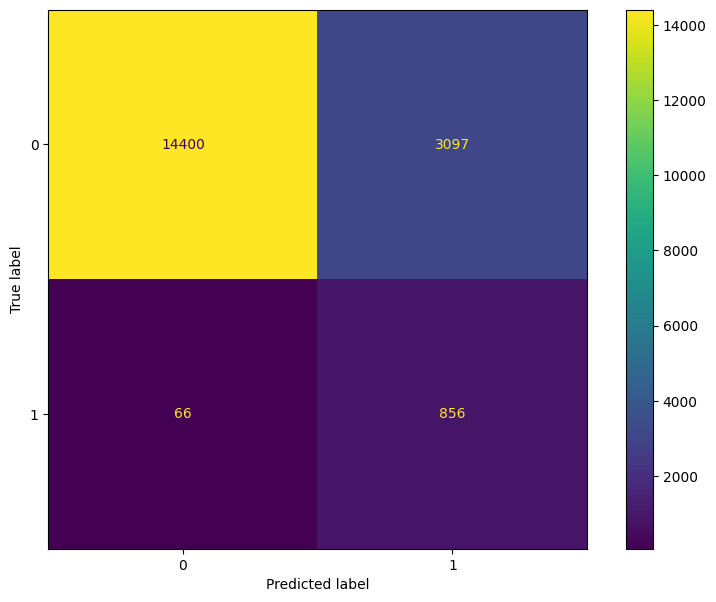

In [ ]:
# the confusion matrix (the best model from gridcv)

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_rf.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=grid_rf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_rf.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
y_pred = grid_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     17497
           1       0.22      0.93      0.35       922

    accuracy                           0.83     18419
   macro avg       0.61      0.88      0.63     18419
weighted avg       0.96      0.83      0.87     18419



### Logistic Regression

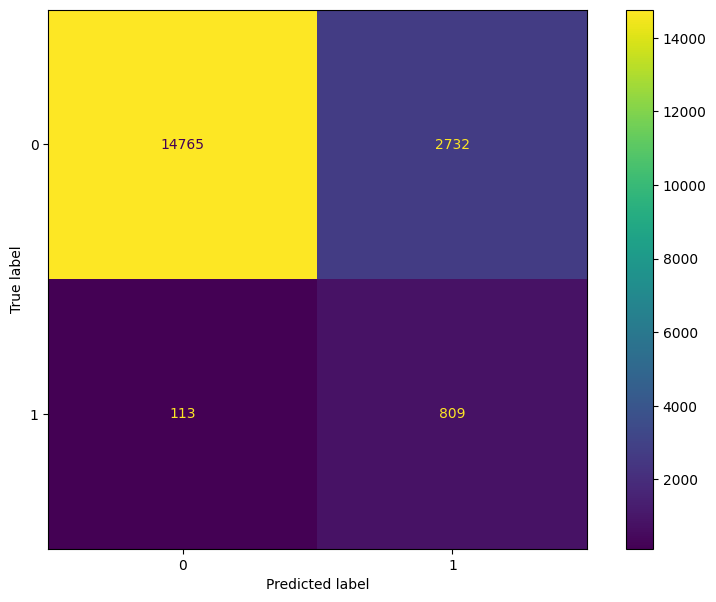

In [ ]:
# the confusion matrix (the best model from gridcv)
fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_lr_train.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=grid_lr_train.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_lr_train.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
y_pred = grid_lr_train.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     17497
           1       0.23      0.88      0.36       922

    accuracy                           0.85     18419
   macro avg       0.61      0.86      0.64     18419
weighted avg       0.95      0.85      0.88     18419



## EVALUATION

### KURVA ROC AOC

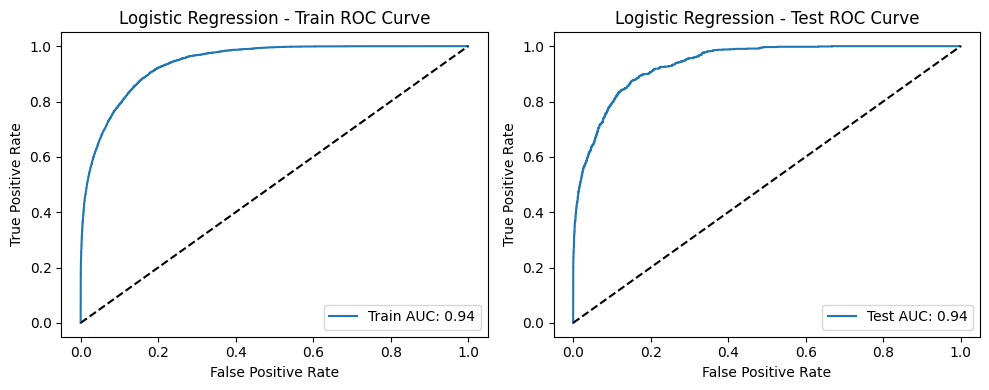

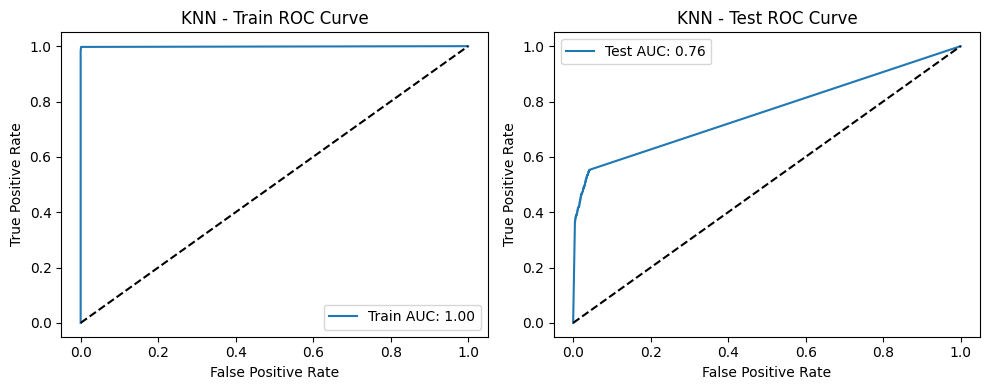

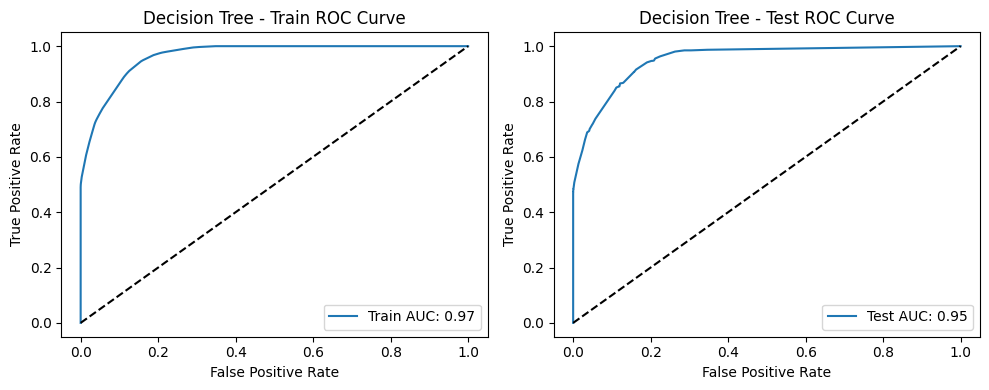

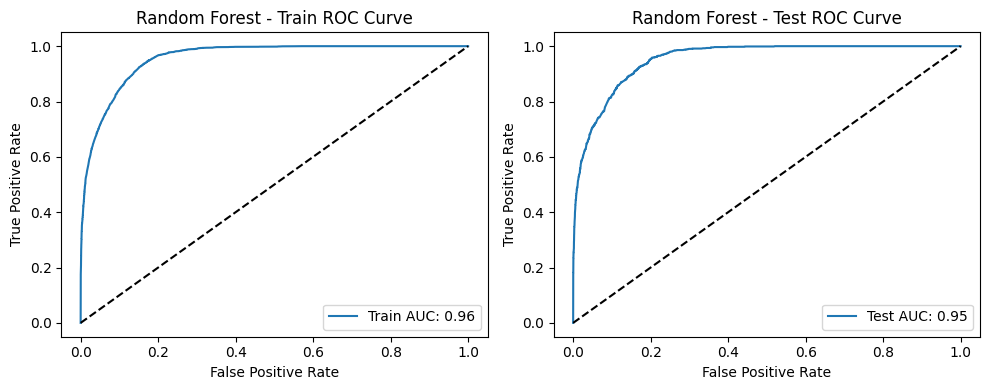

                 Model  AUC Train  AUC Test
3        Random Forest   0.956708  0.952958
2        Decision Tree   0.965179  0.951568
0  Logistic Regression   0.941147  0.938151
1                  KNN   0.998645  0.762265


In [ ]:
model_dict = {
    'Logistic Regression': (grid_lr_train, X_train_scaled, X_test_scaled),
    'KNN': (grid_knn, X_train_scaled, X_test_scaled),
    'Decision Tree': (grid_dt, X_train, X_test),
    'Random Forest': (grid_rf, X_train, X_test)
}

auc_results = []

for name, (model, X_tr, X_te) in model_dict.items():
    y_train_proba = model.predict_proba(X_tr)[:, 1]
    y_test_proba = model.predict_proba(X_te)[:, 1]

    auc_train = roc_auc_score(y_train, y_train_proba)
    auc_test = roc_auc_score(y_test, y_test_proba)

    auc_results.append({
        'Model': name,
        'AUC Train': auc_train,
        'AUC Test': auc_test
    })

    # Plot ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

    plt.figure(figsize=(10, 4))

    # Train ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Train ROC Curve')
    plt.legend()

    # Test ROC
    plt.subplot(1, 2, 2)
    plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Test ROC Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Tabel hasil AUC
df_auc = pd.DataFrame(auc_results)
print(df_auc.sort_values('AUC Test', ascending=False))


Interpretasi AUC-ROC: **Logistic Regression, Random Forest, dan Decision Tree memiliki nilai AUC train dan Test yang hampir mirip, sehingga menunjukkan model cenderung tidak mengalami overfitting. Berbeda, dengan KNN yang memiliki nilai AUC train dan test yang cukup jauh > 15%, maka menunjukkan model cenderung mengalami overfitting.**

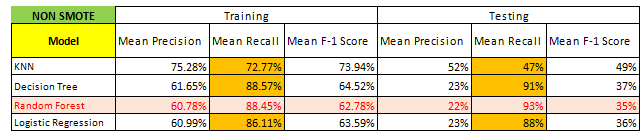

Berdasarkan hasil evaluasi dari model yang sudah dilatih dan sudah dilakukan pengujian pada testing, didapatkan bahwa:
- KNN menunjukkan overfitting (tidak mampu mengeneralisasi dengan baik) dalam artian training bagus tpi testing jelek
- Decision Tree, Random Forest, dan Logistic menunjukkan tidak overfitting (mampu megeneralisasi dengan baik)

**Trus, kita harus milih yang mana dong??**

Case: **Recall tinggi sangat penting → Deteksi sebanyak mungkin pasien yang benar-benar diabetes**

Maka model yang cocok untuk non SMOTE adalah -> Random Forest. Karena nilai recallnya cukup tinggi dan tidak terlalu overftitting juga.

### Feature Importance

Feature Importance **digunakan untuk menilai seberapa besar kontribusi setiap fitur (variabel) terhadap performa model prediksi atau klasifikasi**. Feature Importane hanya dilakukan pada Data Training saja.

#### Training Logistic

Karena yang best: Random Forest

In [ ]:
# Ambil best estimator dari GridSearchCV
best_model_rf = grid_rf.best_estimator_

# Ambil feature importances dari RandomForestClassifier dalam pipeline
importances = best_model_rf.feature_importances_

# Buat DataFrame dengan nama fitur dan importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)  # ascending=True agar bar paling penting di atas

# Jika ingin nilai absolutnya (meskipun biasanya sudah positif semua)
feature_importance['AbsImportance'] = feature_importance['Importance']

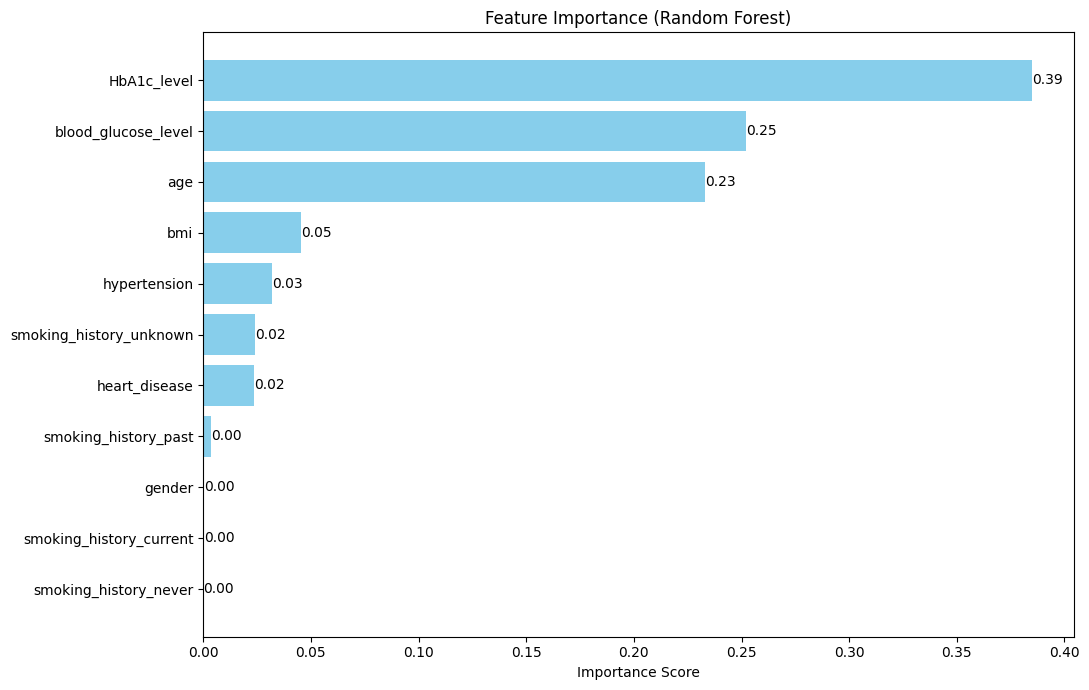

In [ ]:
plt.figure(figsize=(11, 7))
bars = plt.barh(
    feature_importance['Feature'],
    feature_importance['Importance'],
    color='skyblue'
)

# Tambahkan label angka di ujung bar (kanan)
for i, coef in enumerate(feature_importance['Importance']):
    plt.text(coef + 0, i, f'{coef:.2f}', va='center', ha='left', color='black')

# Judul dan label
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


Interpretasi:
**Variabel-variabel yang memiliki kontribusi cukup besar terhadap performa model adalah kadar gula darah, kadar hemoglobin (kadar HbA1c), dan age**

## SMOTE

**Karena data dicoba SMOTE, jika smote maka wajib model-model selain KNN perlu dilakukan random state saja, tanpa class_weight. Kenapa, KNN tidak perlu, karena sifatnya deterministik dimana KNN tidak melibatkan proses acak. Kenapa tidak perlu class_weight karena sudah seimbang, takutnya nanti berlebihan jadinya bias**

In [ ]:
#pisahkan numerik dan non numerik
numerik_df = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
non_numerik_df = [col for col in X_train.columns if col not in numerik_df]

In [ ]:
# 1. Tentukan index fitur kategorikal untuk SMOTENC
categorical_features = [X_train.columns.get_loc(col) for col in non_numerik_df]

# 2. Pastikan y_train dalam 1D array
y_train_1d = y_train.values.ravel()

In [ ]:
# 3. SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train_1d)

# 4. Cek distribusi label setelah resampling
print(np.bincount(y_train_resampled))

[69956 69956]


In [ ]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139912 entries, 0 to 139911
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   139912 non-null  int64  
 1   age                      139912 non-null  float64
 2   hypertension             139912 non-null  int64  
 3   heart_disease            139912 non-null  int64  
 4   bmi                      139912 non-null  float64
 5   HbA1c_level              139912 non-null  float64
 6   blood_glucose_level      139912 non-null  object 
 7   smoking_history_current  139912 non-null  float64
 8   smoking_history_never    139912 non-null  float64
 9   smoking_history_past     139912 non-null  float64
 10  smoking_history_unknown  139912 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 11.7+ MB


Ubah **blood_glucose_level** ke numerik.

In [ ]:
X_train_resampled['blood_glucose_level'] = pd.to_numeric(X_train_resampled['blood_glucose_level'], errors='coerce')

In [ ]:
X_train_resampled

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown
0,0,46.000000,0,0,23.570000,5.700000,159.0,0.0,0.0,1.0,0.0
1,0,74.000000,0,0,29.800000,6.100000,130.0,0.0,0.0,0.0,1.0
2,0,4.000000,0,0,27.320000,6.500000,130.0,0.0,1.0,0.0,0.0
3,1,28.000000,0,0,31.660000,5.000000,200.0,0.0,1.0,0.0,0.0
4,1,44.000000,0,0,27.320000,4.000000,155.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
139907,1,72.000000,0,0,28.441813,6.566572,160.0,0.0,0.0,1.0,0.0
139908,1,51.353306,0,0,38.047821,6.429339,140.0,0.0,0.0,1.0,0.0
139909,0,55.000000,0,0,27.320000,7.330142,160.0,0.0,0.0,1.0,0.0
139910,1,77.046967,0,0,33.510372,6.800000,130.0,0.0,0.0,1.0,0.0


In [ ]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled[numerik_df])

In [ ]:
#gabung
X_train_resampled_scaled = pd.concat([
    X_train_resampled[non_numerik_df].reset_index(drop=True),
    pd.DataFrame(X_train_resampled_scaled, columns=numerik_df)
], axis=1)

In [ ]:
X_train_resampled_scaled

,gender,hypertension,heart_disease,smoking_history_current,smoking_history_never,smoking_history_past,smoking_history_unknown,age,bmi,HbA1c_level,blood_glucose_level
0,0,0,0,0.0,0.0,1.0,0.0,-0.233275,-0.873918,-0.287785,0.217946
1,0,0,0,0.0,0.0,0.0,1.0,1.049038,0.396348,0.110138,-0.510481
2,0,0,0,0.0,1.0,0.0,0.0,-2.156744,-0.109311,0.508061,-0.510481
3,1,0,0,0.0,1.0,0.0,0.0,-1.057619,0.775593,-0.984150,1.247792
4,1,0,0,0.0,0.0,0.0,1.0,-0.324869,-0.109311,-1.978957,0.117473
...,...,...,...,...,...,...,...,...,...,...,...
139907,1,0,0,0.0,0.0,1.0,0.0,0.957444,0.119421,0.574287,0.243064
139908,1,0,0,0.0,0.0,1.0,0.0,0.011890,2.078038,0.437767,-0.259299
139909,0,0,0,0.0,0.0,1.0,0.0,0.178897,-0.109311,1.333892,0.243064
139910,1,0,0,0.0,0.0,1.0,0.0,1.188579,1.152875,0.806503,-0.510481


### TRAINING

#### KNN

In [ ]:
# Parameter yang dituning
param_knn = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Buat scorers
scorers = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# GridSearchCV dengan multiple scoring
grid_knn_after = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_knn,
    scoring=scorers,
    refit='recall',  # gunakan recall sebagai metrik utama untuk pemilihan model
    cv=5,
    return_train_score=True
)

# Fit model
grid_knn_after.fit(X_train_resampled_scaled, y_train_resampled)

# Ambil hasil cross-validation
cv_result = pd.DataFrame(grid_knn_after.cv_results_)

# Pilih kolom-kolom penting
retain_cols = [
    'params',
    'mean_train_precision', 'mean_test_precision',
    'mean_train_recall', 'mean_test_recall',
    'mean_train_f1', 'mean_test_f1',
    'rank_test_recall'
]

# Tampilkan hasil disortir berdasarkan recall
cv_result[retain_cols].sort_values('rank_test_recall')

,params,mean_train_precision,mean_test_precision,mean_train_recall,mean_test_recall,mean_train_f1,mean_test_f1,rank_test_recall
11,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.999575,0.954459,0.999575,0.953850,0.999575,0.953834,1
13,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.999575,0.952075,0.999575,0.950619,0.999575,0.950579,2
1,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.999575,0.949421,0.999575,0.948639,0.999575,0.948617,3
15,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.999575,0.949995,0.999575,0.947989,0.999575,0.947930,4
12,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.972282,0.948796,0.971600,0.947167,0.971590,0.947119,5
10,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.986556,0.947048,0.986184,0.946981,0.986182,0.946979,6
17,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.999575,0.948290,0.999575,0.945866,0.999575,0.945793,7
3,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.999575,0.946306,0.999575,0.944587,0.999575,0.944533,8
19,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.999575,0.946605,0.999575,0.943829,0.999575,0.943741,9
5,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.999575,0.944198,0.999575,0.941885,0.999575,0.941809,10


#### Decision Tree

In [ ]:
# 1. Parameter tuning yang kamu pakai
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Skor evaluasi yang ingin kamu hitung
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 3. GridSearchCV dengan multi-metric
grid_dt_after = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_dt,
    scoring=scoring,
    refit='recall',  # Model terbaik dipilih berdasarkan recall tertinggi
    cv=5
)

# 4. Fit model ke training data
grid_dt_after.fit(X_train_resampled, y_train_resampled)

# 5. Lihat hasil evaluasi
cv_result = pd.DataFrame(grid_dt_after.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
23,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.974903,0.973848,0.973813,1
22,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.974654,0.973533,0.973498,2
11,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.974500,0.973476,0.973441,3
10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.974257,0.973219,0.973186,4
21,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.974042,0.972854,0.972820,5
9,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.973307,0.972182,0.972150,6
19,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915394,0.914954,0.914933,7
18,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915387,0.914947,0.914926,8
20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.915357,0.914918,0.914897,9
6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.915066,0.914275,0.914225,10


#### Random Forest

In [ ]:
# 1. Parameter untuk tuning
param_rf = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5]
}

# 2. Multi-metric scoring
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 3. GridSearchCV
grid_rf_after = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    scoring=scoring,
    refit='recall',  # refit pakai recall tertinggi
    cv=5
)

# 4. Fit ke data training
grid_rf_after.fit(X_train_resampled, y_train_resampled)

# 5. Lihat hasil cross-validation
cv_result = pd.DataFrame(grid_rf_after.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
20,"{'max_depth': 5, 'n_estimators': 10}",0.903579,0.899258,0.898988,1
18,"{'max_depth': 4, 'n_estimators': 40}",0.901389,0.898172,0.897969,2
21,"{'max_depth': 5, 'n_estimators': 20}",0.900972,0.898072,0.897888,3
19,"{'max_depth': 4, 'n_estimators': 50}",0.900230,0.897485,0.897311,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.900534,0.897428,0.897230,5
23,"{'max_depth': 5, 'n_estimators': 40}",0.900412,0.897385,0.897192,6
24,"{'max_depth': 5, 'n_estimators': 50}",0.900179,0.897250,0.897063,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.902173,0.897099,0.896777,8
15,"{'max_depth': 4, 'n_estimators': 10}",0.900347,0.896163,0.895893,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.900461,0.894605,0.894221,10


#### Logistic Regression

In [ ]:
# 1. Pipeline
pipeline_lr = Pipeline([
    ('clf', LogisticRegression(
        solver='liblinear',
        random_state=42  # sesuaikan dengan kondisi data
    ))
])

# 2. Parameter grid
param_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# 3. Scoring multiple metrics
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 4. Grid search dengan multi-metric
grid_lr_after = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_lr,
    scoring=scoring,
    refit='recall',  # pilih model terbaik berdasarkan recall
    cv=5
)

# 5. Fit model
grid_lr_after.fit(X_train_resampled_scaled, y_train_resampled)

# 6. Hasil grid search
cv_result = pd.DataFrame(grid_lr_after.cv_results_)
retain_cols = ['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'rank_test_recall']
cv_result[retain_cols].sort_values('rank_test_recall')

,params,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_recall
1,"{'clf__C': 0.01, 'clf__penalty': 'l2'}",0.869356,0.868803,0.868754,1
7,"{'clf__C': 10, 'clf__penalty': 'l2'}",0.869079,0.868617,0.868576,2
6,"{'clf__C': 10, 'clf__penalty': 'l1'}",0.869051,0.868589,0.868548,3
0,"{'clf__C': 0.01, 'clf__penalty': 'l1'}",0.869176,0.868582,0.868529,4
4,"{'clf__C': 1, 'clf__penalty': 'l1'}",0.869016,0.868553,0.868512,5
5,"{'clf__C': 1, 'clf__penalty': 'l2'}",0.868982,0.868517,0.868476,6
2,"{'clf__C': 0.1, 'clf__penalty': 'l1'}",0.868847,0.868374,0.868332,7
3,"{'clf__C': 0.1, 'clf__penalty': 'l2'}",0.868805,0.868339,0.868297,8


### TESTING

#### KNN

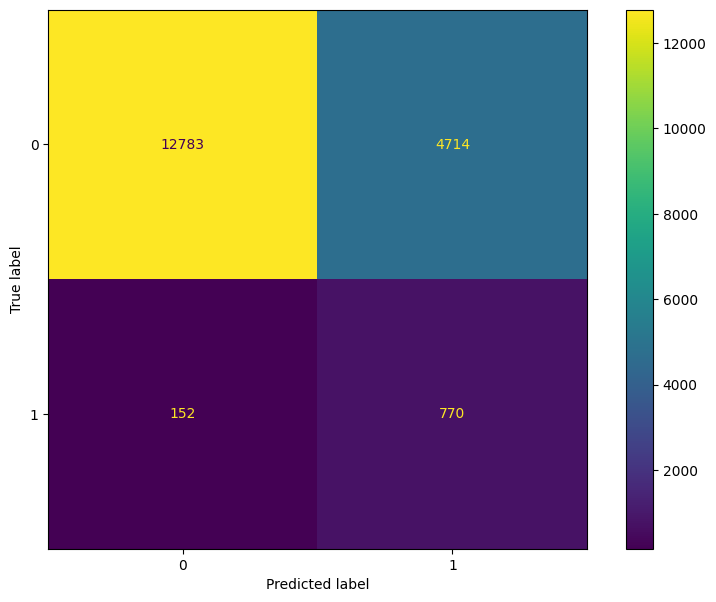

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     17497
           1       0.14      0.84      0.24       922

    accuracy                           0.74     18419
   macro avg       0.56      0.78      0.54     18419
weighted avg       0.95      0.74      0.81     18419



In [ ]:
# the confusion matrix (the best model from gridcv)

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_knn_after.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=grid_knn_after.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_knn_after.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Decision Tree

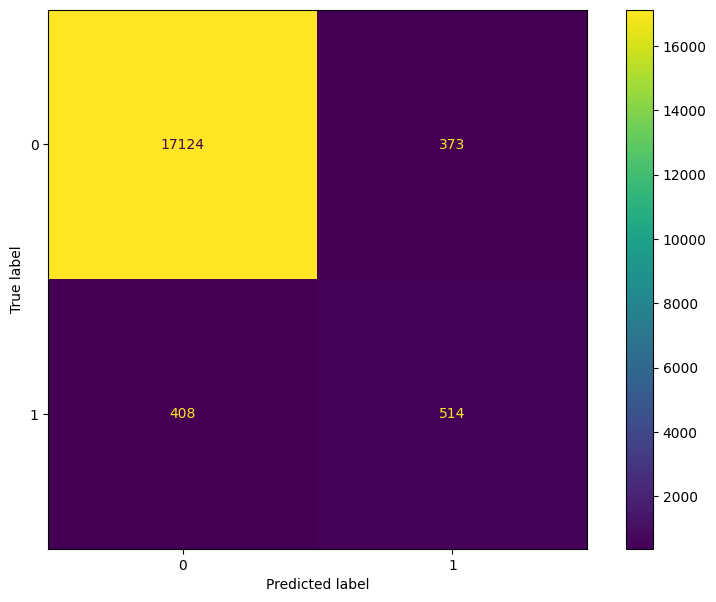

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17497
           1       0.58      0.56      0.57       922

    accuracy                           0.96     18419
   macro avg       0.78      0.77      0.77     18419
weighted avg       0.96      0.96      0.96     18419



In [ ]:
# the confusion matrix (the best model from gridcv)
fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_dt_after.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=grid_dt_after.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_dt_after.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Random Forest

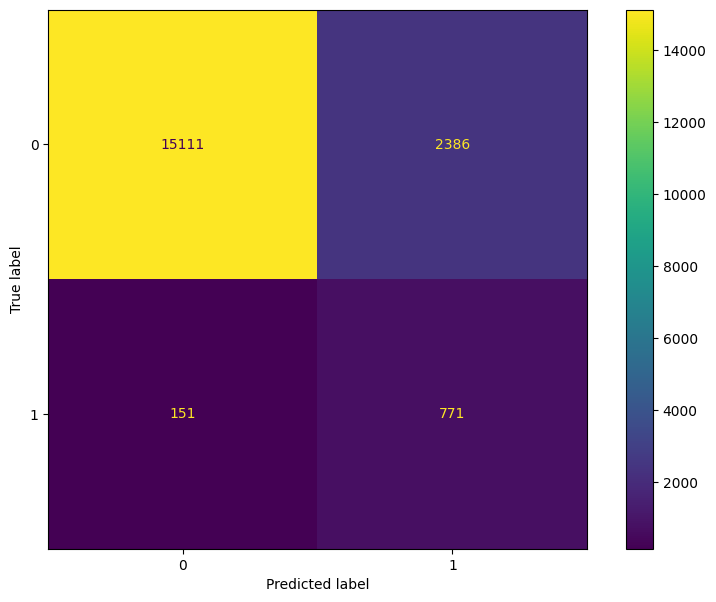

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17497
           1       0.24      0.84      0.38       922

    accuracy                           0.86     18419
   macro avg       0.62      0.85      0.65     18419
weighted avg       0.95      0.86      0.90     18419



In [ ]:
# the confusion matrix (the best model from gridcv)

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_rf_after.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=grid_rf_after.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_rf_after.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Logistic Regression

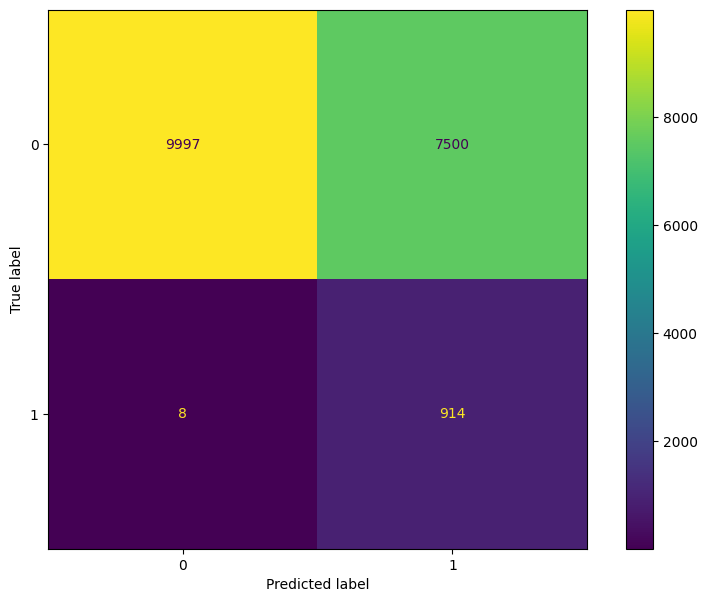

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     17497
           1       0.11      0.99      0.20       922

    accuracy                           0.59     18419
   macro avg       0.55      0.78      0.46     18419
weighted avg       0.95      0.59      0.70     18419



In [ ]:
# the confusion matrix (the best model from gridcv)
fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_lr_after.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=grid_lr_after.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_lr_after.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## EVALUATION

### KURVA ROC AOC

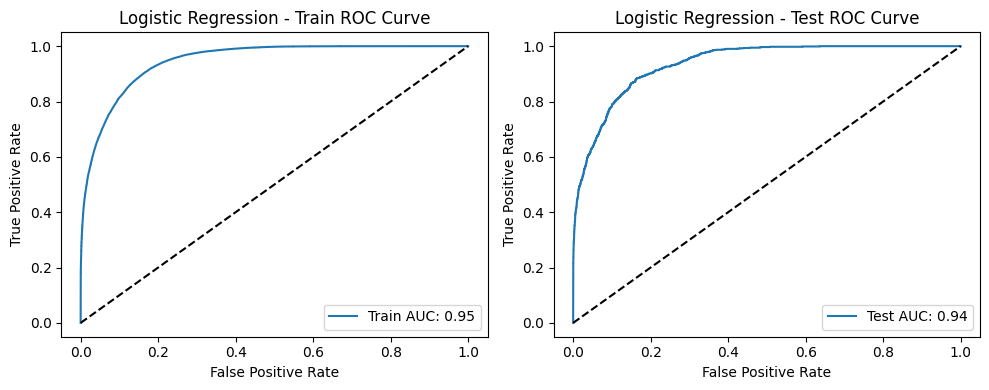

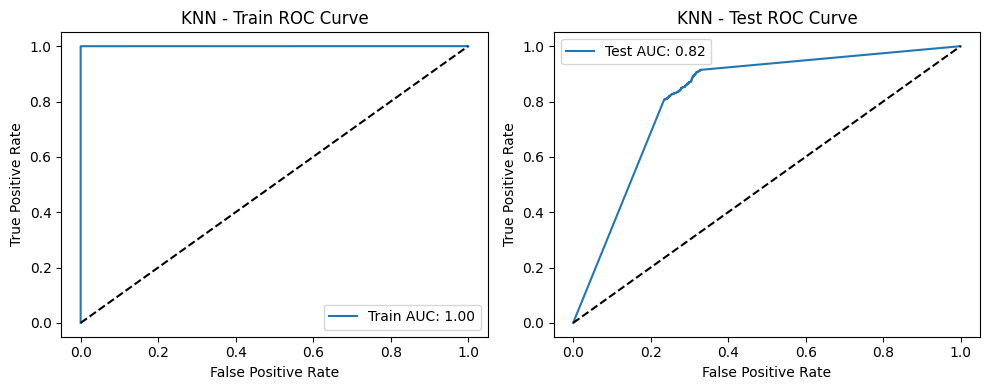

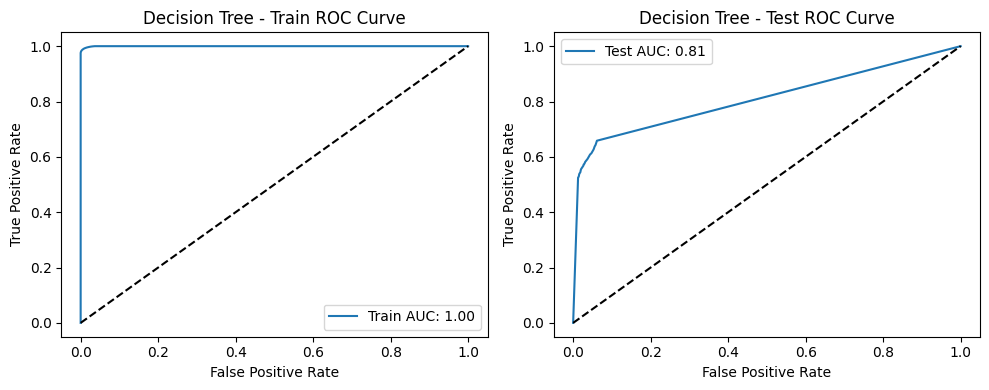

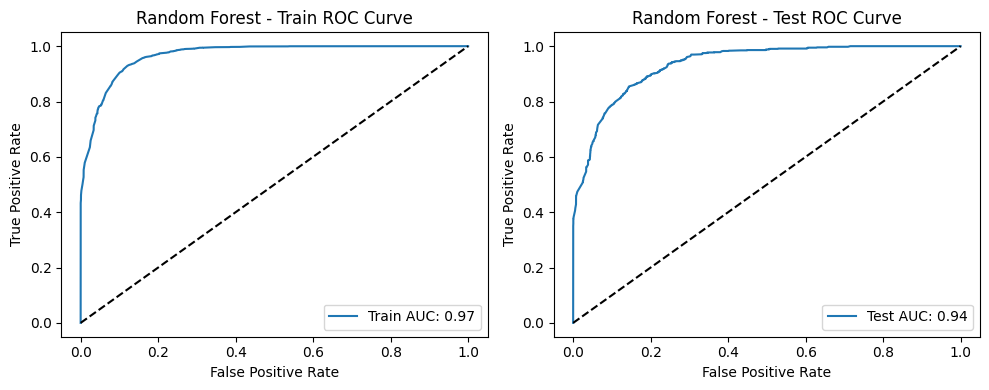

                 Model  AUC Train  AUC Test
0  Logistic Regression   0.946686  0.936559
3        Random Forest   0.967159  0.935144
1                  KNN   0.999935  0.817413
2        Decision Tree   0.999791  0.810447


In [ ]:
model_dict = {
    'Logistic Regression': (grid_lr_after, X_train_resampled_scaled, X_test_scaled),
    'KNN': (grid_knn_after, X_train_resampled_scaled, X_test_scaled),
    'Decision Tree': (grid_dt_after, X_train_resampled, X_test),
    'Random Forest': (grid_rf_after, X_train_resampled, X_test)
}

auc_results = []

for name, (model, X_tr, X_te) in model_dict.items():
    y_train_proba = model.predict_proba(X_tr)[:, 1]
    y_test_proba = model.predict_proba(X_te)[:, 1]

    auc_train = roc_auc_score(y_train_resampled, y_train_proba)
    auc_test = roc_auc_score(y_test, y_test_proba)

    auc_results.append({
        'Model': name,
        'AUC Train': auc_train,
        'AUC Test': auc_test
    })

    # Plot ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

    plt.figure(figsize=(10, 4))

    # Train ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Train ROC Curve')
    plt.legend()

    # Test ROC
    plt.subplot(1, 2, 2)
    plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - Test ROC Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Tabel hasil AUC
df_auc = pd.DataFrame(auc_results)
print(df_auc.sort_values('AUC Test', ascending=False))


Interpretasi AUC-ROC:
**Logistic Regression dan Random Forest memiliki nilai AUC train dan Test yang hampir mirip, sehingga menunjukkan model cenderung tidak mengalami overfitting. Berbeda, dengan KNN dan Decision Tree yang memiliki nilai AUC train dan test yang cukup jauh > 15%, maka menunjukkan model cenderung mengalami overfitting.**

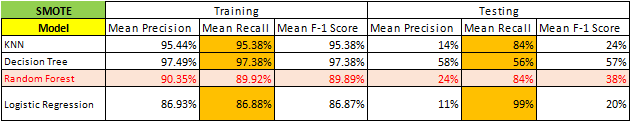

Berdasarkan hasil evaluasi dari model SMOTE yang sudah dilatih dan sudah dilakukan pengujian pada testing, didapatkan bahwa:
- KNN menunjukkan sedikit overfitting karena turunnya dari train ke testing sekitar 11% an.
- Decision Tree overfitting karena turunnya cukup jauh, sehingga model tidak mampu mengeneralisasi dengan baik.
- Random Forest sedikit overtfitting karena turunnya dari train ke testing sekitar 5,92% an.
- Logistic Regression overfittng, karena kenaikannya cukup tinggi/ekstrem. (hampir 12%)

Maka, memilih model yang **Random Forest**. karena tidak terlalu overfitting juga.

### Feature Importance

Feature Importance **digunakan untuk menilai seberapa besar kontribusi setiap fitur (variabel) terhadap performa model prediksi atau klasifikasi**. Feature Importane hanya dilakukan pada Data Training saja.

#### Training Logistic

Menggunakan best: Random Forest

In [ ]:
# Ambil best estimator dari GridSearchCV
best_model_rf = grid_rf_after.best_estimator_

# Ambil feature importances dari model Random Forest
importances_rf = best_model_rf.feature_importances_

# Buat DataFrame dengan nama fitur dan skor pentingnya
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=True)  # ascending=True agar fitur terpenting di atas

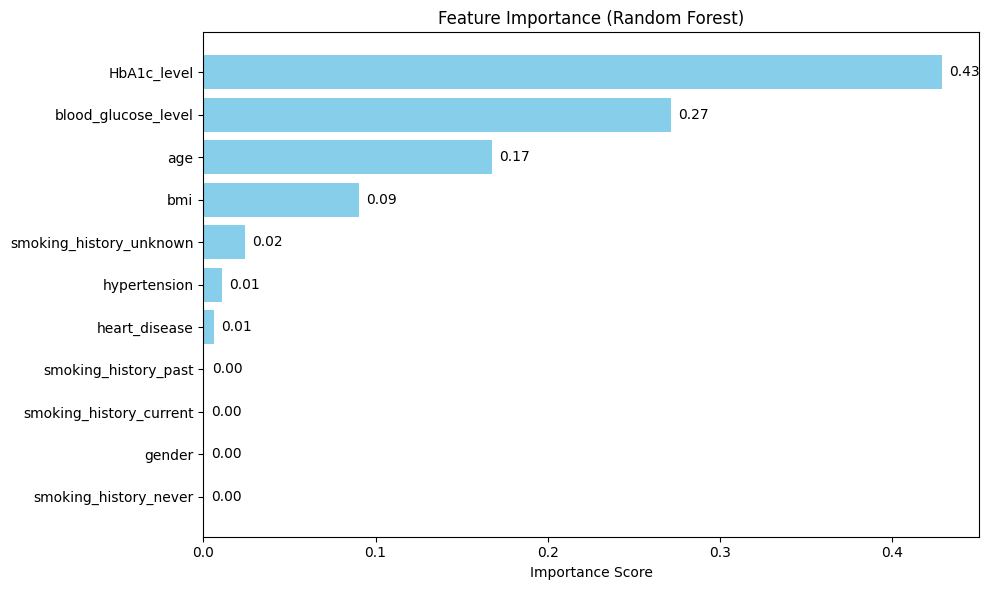

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    feature_importance_rf['Feature'],
    feature_importance_rf['Importance'],
    color='skyblue'  # Tidak perlu logika warna berdasarkan nilai
)

# Tambahkan label angka di ujung bar (kanan)
for i, coef in enumerate(feature_importance_rf['Importance']):
    offset = max(feature_importance_rf['Importance']) * 0.01  # Offset dinamis
    plt.text(coef + offset, i, f'{coef:.2f}', va='center', ha='left', color='black')

# Judul dan label
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


Interpretasi:
**Variabel-variabel yang memiliki kontribusi cukup besar terhadap performa model adalah kadar gula darah, kadar hemoglobin (kadar HbA1c), dan age**



---



## KEPUTUSAN

**KEPUTUSAN**

Perbandingan Antara SMOTE dan NON SMOTE. Karena Recall mengukur seberapa baik model dalam menangkap semua positif sejati (True Positives) di antara semua data yang seharusnya positif. (konteks: diabetes)

* RF NON SMOTE, 88.45% (training) vs 93% (testing) -> selisih 4.55%
* ⁠RF SMOTE, 89.92% (training) vs 84% (testing) -> selisih 5.92%

Maka yang dipilih adalah:
**Random Forest - Non SMOTE (dengan selisih dari segi overfitting sebesar 4,55%)**. Karena, Model RF NON SMOTE lebih well-generalized, atau tidak terlalu overfitting. Selain itu, dari sisi recall yang lebih tinggi pada model ini menunjukkan bahwa model ini lebih cenderung mendeteksi lebih banyak kelas positif.



---



**REKOMENDASI**
- Model ini bisa digunakan **untuk menyaring pasien yang memiliki risiko tinggi diabetes** berdasarkan faktor-faktor seperti usia, berat badan, tekanan darah, kadar glukosa, dan faktor gaya hidup.
- **Menggunakan model untuk skrining rutin** di klinik atau rumah sakit, membantu tenaga medis untuk memprioritaskan pasien yang perlu pemeriksaan lebih lanjut.
- Sebagai **strategi kebijakan** dalam program pengelolaan berat badan, perubahan gaya hidup, dan pemantauan kadar gula darah yang lebih intensif.
- **Pemantauan Pasien Berisiko Secara Berkelanjutan**.
- Perusahaan farmasi atau perawatan kesehatan bisa **memanfaatkan model ini untuk merencanakan produksi obat** atau pembentukan kebijakan kesehatan yang **lebih tepat sasaran** untuk populasi yang berisiko tinggi diabetes.
- **Menetapkan kebijakan penyuluhan bahayanya diabetes** ke masyarakat sekitar guna meningkatkan kesadaran masyarakat tentang risiko diabetes.